### Atanasius Surya Gunadharma
### 220711667


### 1. Load and Filter Data

This section loads the original dataset and filters sentences where the 'fuel' column has a negative sentiment.

In [12]:
import pandas as pd
import os
import nltk

# Load the dataset
file_path = r"train_preprocess.csv"
df = pd.read_csv(file_path)

# Filter sentences where fuel is negative
negative_fuel_df = df[df['fuel'] == 'negative'][['sentence']]

# Display a sample of the filtered dataset
print(negative_fuel_df.head())
nltk_data_dir = r"nltk_data"

os.makedirs(nltk_data_dir, exist_ok=True)
# Download stopwords to the specified directory
nltk.download('stopwords', download_dir=nltk_data_dir)


                                              sentence
1    Avanza kenapa jadi boros bensin begini dah ah....
38   dari segi kenyamanan cortez oke lah, tapi baha...
113  kalau sudah di atas 120 km / jam boros banget ...
116          Rush konde konsumsi BBM yang tetap irit .
124  pengalaman saya punya avanza bahan bakar nya l...


[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2. Text Summarization

This section performs text summarization using the TextRank algorithm from the Sumy library.


In [13]:
import spacy
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the SpaCy Indonesian model
nlp = spacy.blank('id')
nlp.add_pipe('sentencizer')

def custom_tokenizer(text):
  return [token.text for token in nlp(text)]

def enhanced_tokenizer(text):
 # Remove stopwords and non-meaningful tokens
    from nltk.corpus import stopwords
    try:
        stop_words = set(stopwords.words('indonesian'))
    except:
        import nltk
        nltk.download('stopwords')
        stop_words = set(stopwords.words('indonesian'))

    # Your existing custom_tokenizer logic here, plus:
    tokens = custom_tokenizer(text)
    # Remove stopwords and very short tokens
    tokens = [
        token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

def textrank_summarizer(text, num_sentences=5):
    # Tokenize sentences
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    # Convert sentences to TF-IDF vectors
    vectorizer = TfidfVectorizer(tokenizer=enhanced_tokenizer, stop_words=None)
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)
 
    # Build the graph and rank sentences
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
 
    # Rank sentences by their TextRank score
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
 
    # Create a DataFrame with sentence scores
    sentence_scores_df = pd.DataFrame(ranked_sentences, columns=["Score", "Sentence"])

    # Return summary and sentence scores
    summary = " ".join([sent for _, sent in ranked_sentences[:num_sentences]])

    return summary, sentence_scores_df

example_text = "semenjak saya pakai toyota calya dompet ku enggak lagi bocor alias bbm nya irit banget . dan enggak sering mengisi bbm lagi ."

print("Example Text:")
print(example_text)

# Tokenize the example text
# Display the example text
print("Tokenized Example Text:")
print(enhanced_tokenizer(example_text))

# Combine sentences into one large text for summarization
text = " ".join(negative_fuel_df['sentence'])
text

# Apply TextRank summarization
summary, sentence_scores = textrank_summarizer(text, 5)

# Display summary
print("Summary:")
print(summary)

# # Display sentence scores
sentence_scores.head() 


Example Text:
semenjak saya pakai toyota calya dompet ku enggak lagi bocor alias bbm nya irit banget . dan enggak sering mengisi bbm lagi .
Tokenized Example Text:
['semenjak', 'pakai', 'toyota', 'calya', 'dompet', 'bocor', 'alias', 'bbm', 'nya', 'irit', 'banget', 'mengisi', 'bbm']
Summary:
ampun deh punya xenia uang habis cuma buat konsumsi bensin livina di tempat gue bensin nya asli boros banget kalau soal ngelitik memang iya avanza bahan bakar nya boros banget pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia sudah harga nya mahal, fortuner ini juga konsumsi bahan bakar nya lumayan menguras dompet Asli avanza saya boros akhir-akhir ini walaupun secara keseluruha oke tapi kalo bensinnya boros jadi malas beli ertiga gaya nya oke banget, tarikan juga mantap dan bandel tapi sayang nya boros banget pakai new avanza bu . secara keseluruhan avanza bagus kecuali pemakaian bensin yang boros sekali Masa konsumsi bensin Toyota Avanza Veloz 12,5 liter per

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Score,Sentence
0,0.126788,ampun deh punya xenia uang habis cuma buat kon...
1,0.115069,pengalaman saya punya avanza bahan bakar nya l...
2,0.109745,secara keseluruhan avanza bagus kecuali pemaka...
3,0.101881,"dari segi kenyamanan cortez oke lah, tapi baha..."
4,0.100000,Baru diisi sudah mau setengah saja .


### 3. Text Similarity

This section computes text similarity between sentences where the fuel column has a negative
sentiment.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(negative_fuel_df['sentence'])

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Display similarity matrix
import pandas as pd
sim_df = pd.DataFrame(similarity_matrix,
index=negative_fuel_df['sentence'],
columns=negative_fuel_df['sentence'])
print(sim_df)

sentence                                            Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .  \
sentence                                                                                                                                  
Avanza kenapa jadi boros bensin begini dah ah. ...                                           1.000000                                     
dari segi kenyamanan cortez oke lah, tapi bahan...                                           0.013448                                     
kalau sudah di atas 120 km / jam boros banget a...                                           0.093155                                     
Rush konde konsumsi BBM yang tetap irit .                                                    0.000000                                     
pengalaman saya punya avanza bahan bakar nya le...                                           0.028798                                     
sudah harga nya mahal, fort

### 4. Text Clustering
This section applies clustering techniques on sentences where the fuel column has a negative
sentiment.

In [15]:
from sklearn.cluster import KMeans

# Choose number of clusters (can be adjusted)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
negative_fuel_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display clustered sentences
print(negative_fuel_df[['sentence', 'cluster']].sort_values(by='cluster'))


                                              sentence  cluster
762                avanza bahan bakar nya boros banget        0
38   dari segi kenyamanan cortez oke lah, tapi baha...        0
113  kalau sudah di atas 120 km / jam boros banget ...        0
157  sudah harga nya mahal, fortuner ini juga konsu...        0
342  walaupun secara keseluruha oke tapi kalo bensi...        0
385  ertiga gaya nya oke banget, tarikan juga manta...        0
394  yamaha lexi speed nya gila, tarikan nya juara,...        0
499  Grand Livina XV AT 2008 ngelitik nya parah kak...        0
448  xenia 1:8 - 9 boros juga ya juragan , karena b...        0
632  ampun deh punya xenia uang habis cuma buat kon...        1
626  Dari semua merek mobil yang pernah saya pakai ...        1
581                vario jauh lebih boros daripada mio        1
555  Ini gue saja yang merasa bensin Xenia boros ba...        1
1    Avanza kenapa jadi boros bensin begini dah ah....        1
418  Masa konsumsi bensin Toyota Avanza 

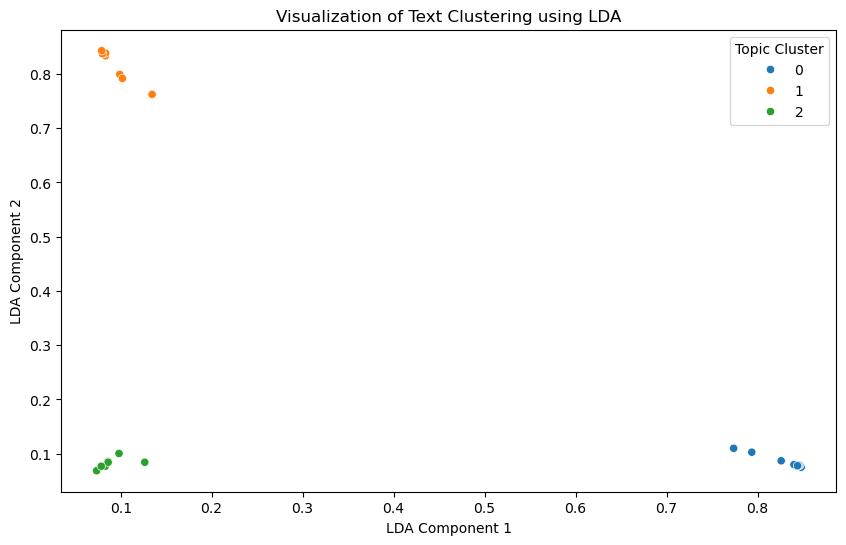

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA for topic modeling
num_topics = 3 # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Assign the most probable topic to each sentence
negative_fuel_df['LDA_Topic'] = np.argmax(lda_matrix, axis=1)

# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lda_matrix[:, 0], y=lda_matrix[:, 1], hue=negative_fuel_df['LDA_Topic'], palette="tab10")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Visualization of Text Clustering using LDA")
plt.legend(title="Topic Cluster")
plt.show()

In [17]:
# Function to display the top words for each topic
def display_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]

    # Convert topics to a DataFrame for display
    topics_df = pd.DataFrame(topics)

    return topics_df

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic
topics = display_topics(lda, feature_names)
topics.head()

,Topic 0,Topic 1,Topic 2
0,nya,boros,punya
1,avanza,juga,memang
2,boros,nya,xenia
3,bakar,ya,yang
4,bahan,oke,saya


In [18]:
# Function to display the top words for each topic per cluster
def display_cluster_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]

    # Convert topics to a DataFrame for display
    topics_df = pd.DataFrame(topics)

    # Associate topics with clusters
    cluster_topics = negative_fuel_df[['sentence', 'LDA_Topic']].copy()
    cluster_topics['Topic Words'] = cluster_topics['LDA_Topic'].apply(lambda x: ",".join(topics_df[f"Topic {x}"]))

    return cluster_topics
    
# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic per cluster
topic_cluster = display_cluster_topics(lda, feature_names)
topic_cluster.head()

,sentence,LDA_Topic,Topic Words
1,Avanza kenapa jadi boros bensin begini dah ah....,0,"nya,avanza,boros,bakar,bahan,banget,akhir,bens..."
38,"dari segi kenyamanan cortez oke lah, tapi baha...",0,"nya,avanza,boros,bakar,bahan,banget,akhir,bens..."
113,kalau sudah di atas 120 km / jam boros banget ...,2,"punya,memang,xenia,yang,saya,gue,iya,bensin,ba..."
116,Rush konde konsumsi BBM yang tetap irit .,1,"boros,juga,nya,ya,oke,tapi,dan,jauh,mio,vario"
124,pengalaman saya punya avanza bahan bakar nya l...,2,"punya,memang,xenia,yang,saya,gue,iya,bensin,ba..."


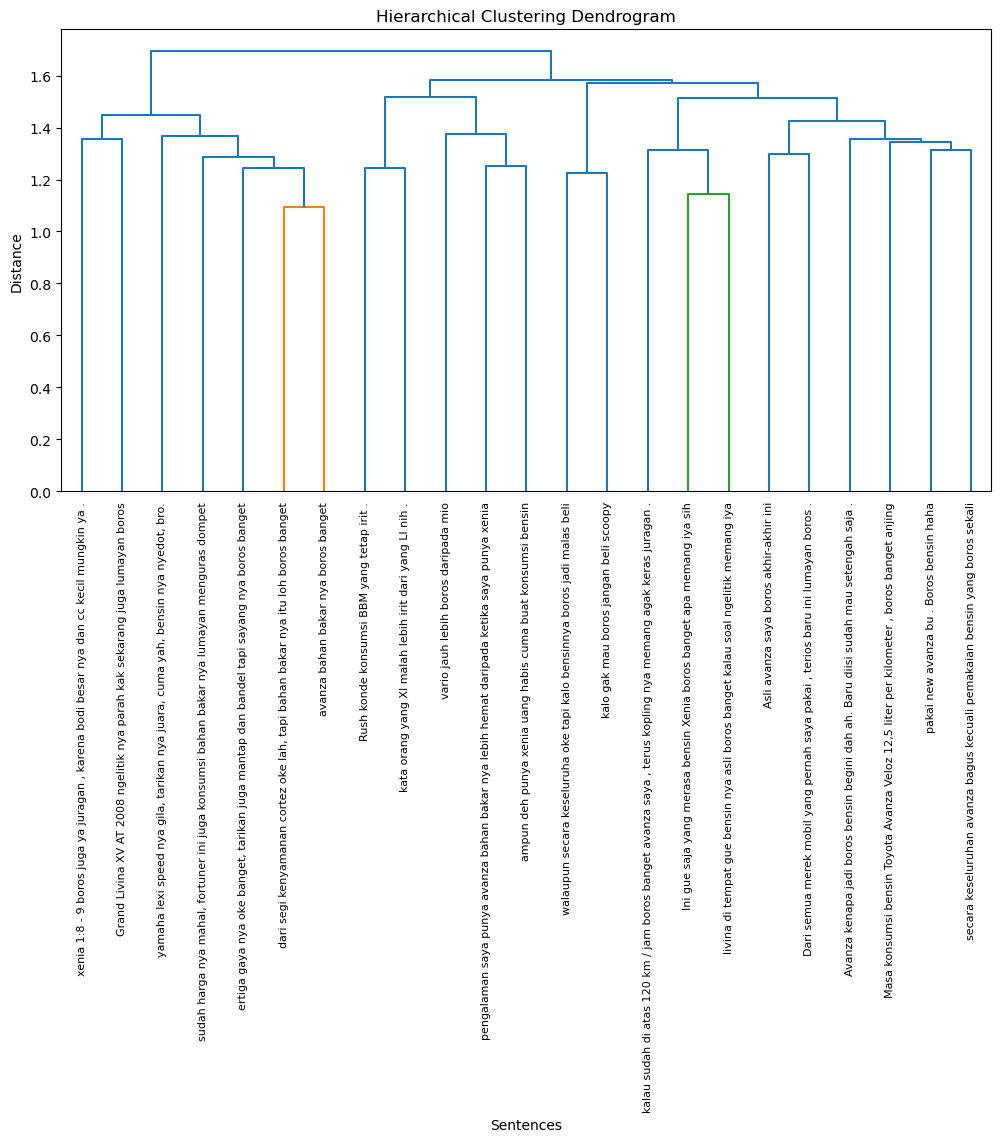

In [19]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = sch.linkage(tfidf_matrix.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix,
labels=negative_fuel_df['sentence'].values, leaf_rotation=90,
leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sentences")
plt.ylabel("Distance")
plt.show()

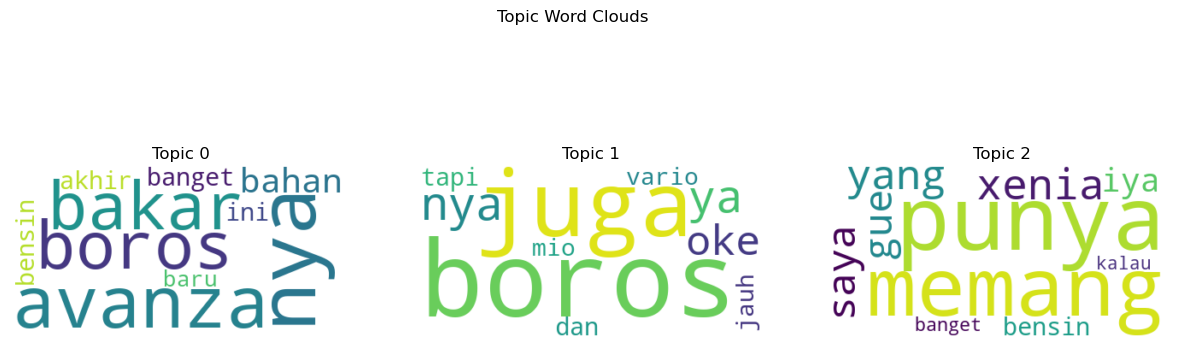

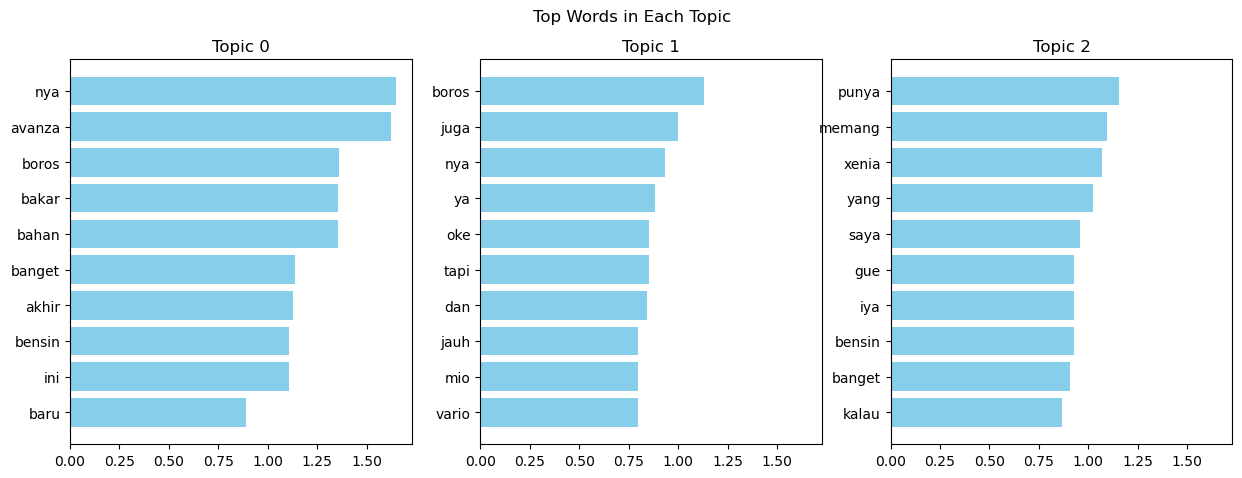

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Function to plot word clouds for topics
def plot_word_clouds(model, feature_names, num_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 5))

    for topic_idx, topic in enumerate(model.components_):
        word_freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_words - 1:-1]}
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freqs)
        axes[topic_idx].imshow(wordcloud, interpolation='bilinear')
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic {topic_idx}")

    plt.suptitle("Topic Word Clouds")
    plt.show()

# Function to plot bar charts of top words per topic
def plot_top_words(model, feature_names, num_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_indices = topic.argsort()[:-num_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        top_weights = topic[top_features_indices]

        axes[topic_idx].barh(top_features, top_weights, color='skyblue')
        axes[topic_idx].invert_yaxis()
        axes[topic_idx].set_title(f"Topic {topic_idx}")

    plt.suptitle("Top Words in Each Topic")
    plt.show()
    
# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
# Plot word clouds and top words for topics
plot_word_clouds(lda, feature_names)
plot_top_words(lda, feature_names)

### 5. Clustering using word2vec

In [21]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.0

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Function to vectorize sentences using the Word2Vec model
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key) # Get vocabulary words
    features = [
        average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
        for tokenized_sentence in corpus
    ]
    return np.array(features)

Epoch: 1, Loss: 0.0
Epoch: 2, Loss: 0.0
Epoch: 3, Loss: 0.0
Epoch: 4, Loss: 0.0
Epoch: 5, Loss: 0.0
Epoch: 6, Loss: 0.0
Epoch: 7, Loss: 0.0
Epoch: 8, Loss: 0.0
Epoch: 9, Loss: 0.0
Epoch: 10, Loss: 0.0
Epoch: 11, Loss: 0.0
Epoch: 12, Loss: 0.0
Epoch: 13, Loss: 0.0
Epoch: 14, Loss: 0.0
Epoch: 15, Loss: 0.0
Epoch: 16, Loss: 0.0
Epoch: 17, Loss: 0.0
Epoch: 18, Loss: 0.0
Epoch: 19, Loss: 0.0


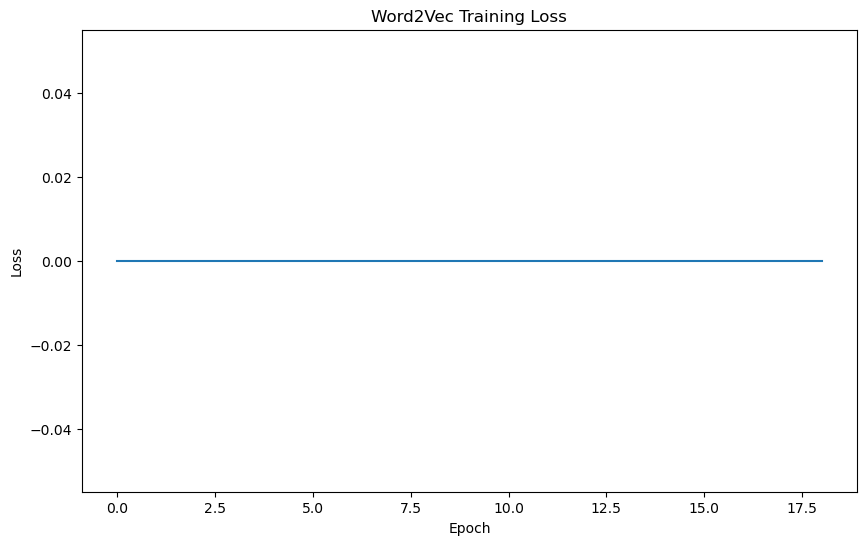


Words similar to 'mobil':
 lcgc: 0.9937
 Confero: 0.9937
 murahan: 0.9933
 bangga: 0.9930
 Harga: 0.9929
 juta: 0.9929
 memilih: 0.9928
 indonesia: 0.9928
 Formo: 0.9927
 ragu: 0.9926

Words similar to 'bensin':
 liter: 0.9878
 12,5: 0.9846
 kak: 0.9841
 boros: 0.9838
 xenia: 0.9832
 kilometer: 0.9827
 ngelitik: 0.9825
 BBM: 0.9824
 menguras: 0.9821
 dompet: 0.9814

Words similar to 'boros':
 avanza: 0.9841
 bensin: 0.9838
 ngelitik: 0.9816
 kak: 0.9815
 120: 0.9804
 liter: 0.9799
 diisi: 0.9787
 penuh: 0.9786
 jam: 0.9775
 12,5: 0.9774

Words similar to 'avanza':
 penuh: 0.9876
 juragan: 0.9875
 nya: 0.9865
 cortez: 0.9849
 120: 0.9841
 boros: 0.9841
 mewah: 0.9837
 kenyamanan: 0.9836
 diisi: 0.9830
 menguras: 0.9830

Words similar to 'bbm':
 kota: 0.9915
 lumayan: 0.9874
 BBM: 0.9857
 dompet: 0.9837
 dikendarai: 0.9831
 Rush: 0.9828
 Beat: 0.9818
 dipakai: 0.9816
 bawa: 0.9812
 terbukti: 0.9811

Words similar to 'konsumsi':
 hemat: 0.9879
 irit: 0.9870
 Rush: 0.9732
 Calya: 0.9691
 

In [22]:
import gensim
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np
import matplotlib.pyplot as plt

# Loss tracking callback
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.loss_previous_step = loss
        else:
            current_loss = loss - self.loss_previous_step
            self.losses.append(current_loss)
            self.loss_previous_step = loss
            print(f'Epoch: {self.epoch}, Loss: {current_loss}')
        self.epoch += 1

all_sentences = []
for df in [df, negative_fuel_df]:
    if 'sentence' in df.columns:
        tokenized = [enhanced_tokenizer(sent) for sent in df['sentence']]
        all_sentences.extend(tokenized)

# Initialize callback
epoch_logger = EpochLogger()

# Train an enhanced Word2Vec model
w2v_model = Word2Vec(
    sentences=all_sentences,
    vector_size=200, # Increased from 100
    window=6, # Context window size
    min_count=2, # Ignore words that appear less than this
    sg=1, # Use skip-gram (1) instead of CBOW (0)
    hs=0, # Use negative sampling instead of hierarchical softmax
    negative=10, # Number of negative samples per positive sample
    ns_exponent=0.75, # Negative sampling distribution exponent
    seed=42, # For reproducibility
    workers=4, # Parallel processing
    epochs=20, # More training iterations
    callbacks=[epoch_logger] # Track training progress
)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_logger.losses)
plt.title('Word2Vec Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate similarity for key terms
test_words = ["mobil", "bensin", "boros", "avanza", "bbm", "konsumsi"]
for word in test_words:
    if word in w2v_model.wv:
        similar = w2v_model.wv.most_similar(word, topn=10)
        print(f"\nWords similar to '{word}':")
        for term, score in similar:
            print(f" {term}: {score:.4f}")

# Visualization of word embeddings using PCA

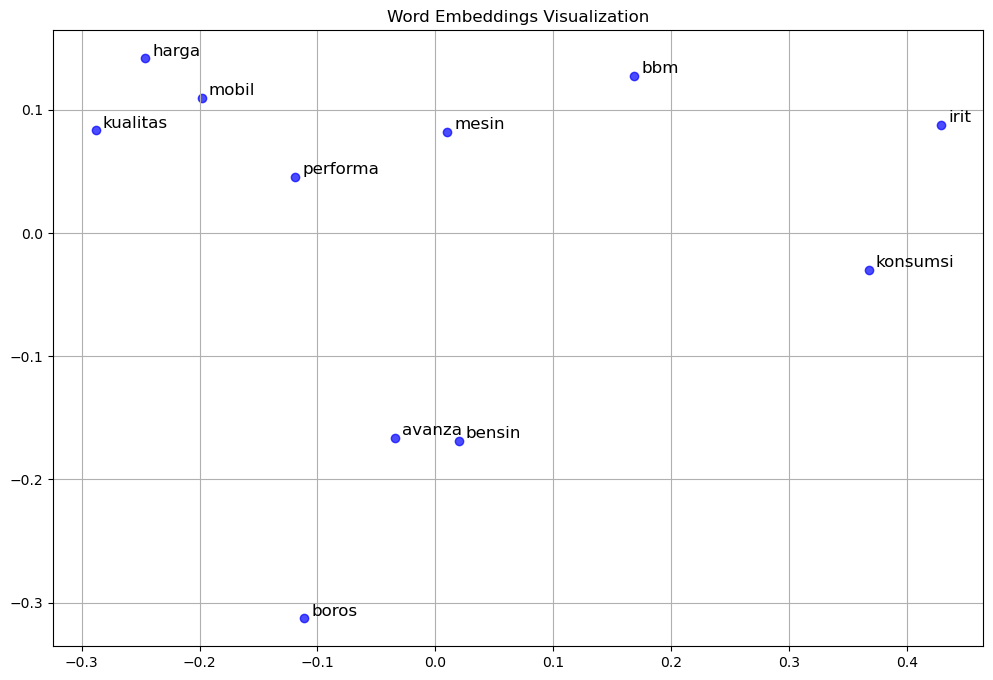

In [23]:
from sklearn.decomposition import PCA
def plot_word_vectors(model, words):
    # Extract vectors for the words
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    words_found = [word for word in words if word in model.wv]

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', alpha=0.7)

    # Add labels for each point
    for i, word in enumerate(words_found):
        plt.annotate(word, xy=(reduced_vectors[i, 0],
        reduced_vectors[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=12, color='black')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()

# Visualize vectors for automotive terms
automotive_terms = ["mobil", "bensin", "bahan_bakar", "avanza", "bbm", "konsumsi", "boros", "irit", "mesin", "performa", "harga", "kualitas"]
plot_word_vectors(w2v_model, automotive_terms)

In [24]:
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA

# Tokenize the sentences for word2vec vectorization
tokenized_sentences = [enhanced_tokenizer(sent) for sent in negative_fuel_df['sentence']]

# Generate feature vectors using Word2Vec model
w2v_feature_array = averaged_word_vectorizer(
    corpus=tokenized_sentences, model=w2v_model, num_features=w2v_model.vector_size
)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

KMeans with 2 clusters - Silhouette: 0.4699, Inertia: 0.3707
KMeans with 3 clusters - Silhouette: 0.2956, Inertia: 0.2961
KMeans with 4 clusters - Silhouette: 0.2720, Inertia: 0.2319
KMeans with 5 clusters - Silhouette: 0.2327, Inertia: 0.1935
KMeans with 6 clusters - Silhouette: 0.2049, Inertia: 0.1777
KMeans with 7 clusters - Silhouette: 0.2355, Inertia: 0.1409


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans with 8 clusters - Silhouette: 0.1984, Inertia: 0.1247


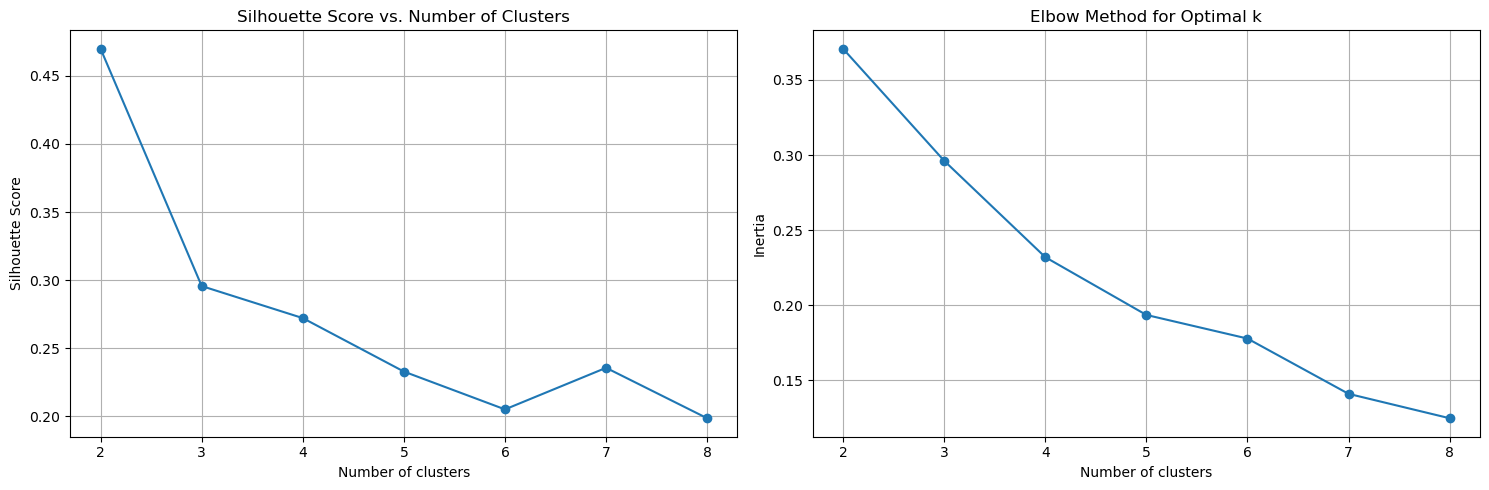

Optimal number of clusters based on silhouette score: 2

KMeans Clustering Results:

Cluster 0:
- Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .
- kalau sudah di atas 120 km / jam boros banget avanza saya , terus kopling nya memang agak keras juragan .
- Asli avanza saya boros akhir-akhir ini
 ... and 15 more sentences

Cluster 1:
- dari segi kenyamanan cortez oke lah, tapi bahan bakar nya itu loh boros banget
- Rush konde konsumsi BBM yang tetap irit .
- pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia
 ... and 2 more sentences
Could not find suitable DBSCAN parameters. Using default parameters.

DBSCAN Clustering Results:

Cluster 0:
- Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .
- dari segi kenyamanan cortez oke lah, tapi bahan bakar nya itu loh boros banget
- kalau sudah di atas 120 km / jam boros banget avanza saya , terus kopling nya memang agak keras juragan .
 ..

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


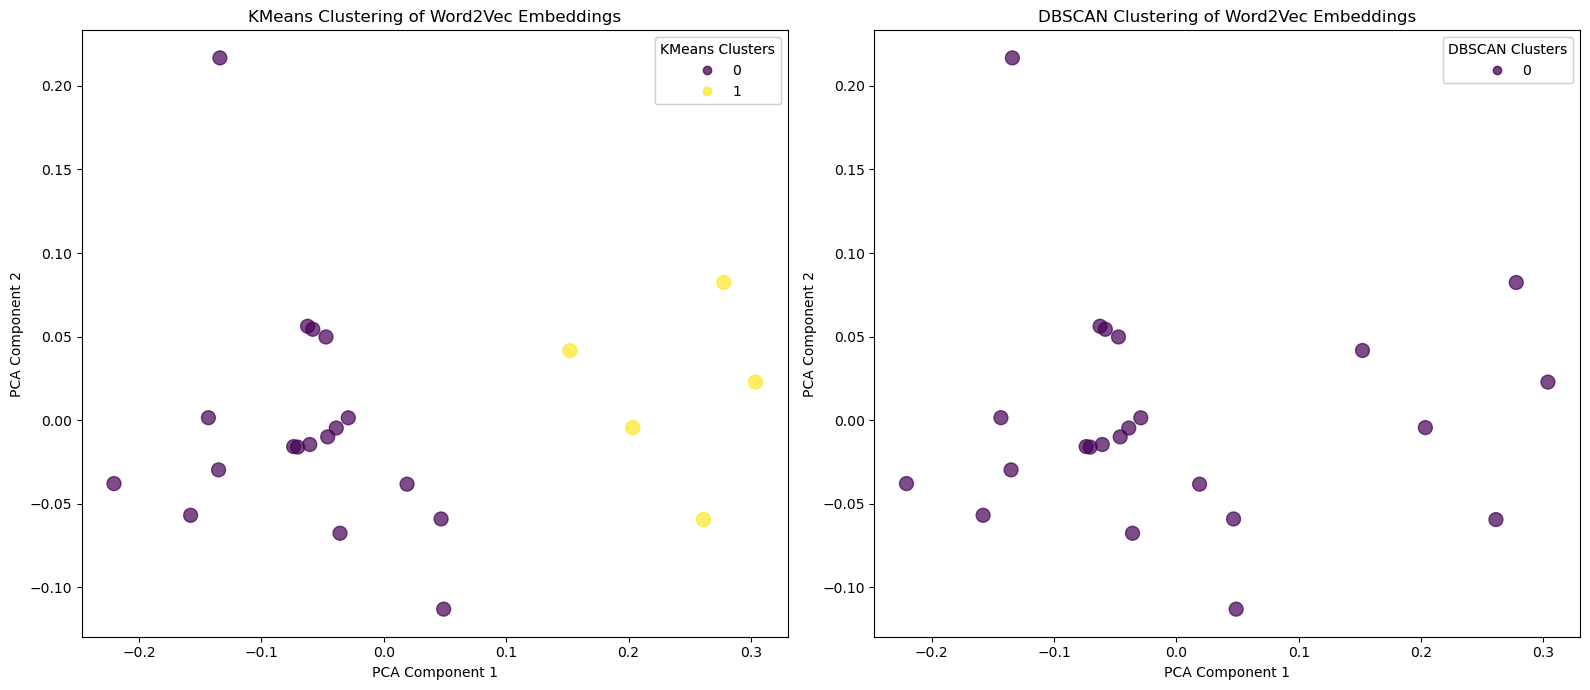


Cluster Comparison:
                                              Sentence  KMeans Cluster  \
1    Avanza kenapa jadi boros bensin begini dah ah....               0   
38   dari segi kenyamanan cortez oke lah, tapi baha...               1   
113  kalau sudah di atas 120 km / jam boros banget ...               0   
116          Rush konde konsumsi BBM yang tetap irit .               1   
124  pengalaman saya punya avanza bahan bakar nya l...               1   
157  sudah harga nya mahal, fortuner ini juga konsu...               1   
276             Asli avanza saya boros akhir-akhir ini               0   
342  walaupun secara keseluruha oke tapi kalo bensi...               0   
385  ertiga gaya nya oke banget, tarikan juga manta...               0   
390            pakai new avanza bu . Boros bensin haha               0   

     DBSCAN Cluster  
1                 0  
38                0  
113               0  
116               0  
124               0  
157               0  
276       

In [25]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply KMeans clustering to the word2vec features
def apply_kmeans_clustering(feature_array, max_clusters=10):
    """
    Apply KMeans clustering with evaluation metrics to find optimal number of clusters
    """
    # Metrics for evaluation
    silhouette_scores = []
    inertias = []

    # Try different numbers of clusters
    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(feature_array)

        # Calculate evaluation metrics
        silhouette = silhouette_score(feature_array, cluster_labels)
        inertia = kmeans.inertia_

        silhouette_scores.append(silhouette)
        inertias.append(inertia)

        print(f"KMeans with {n_clusters} clusters - Silhouette: {silhouette:.4f}, Inertia: {inertia:.4f}")
    
    # Plot silhouette scores and inertia (elbow method)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(range(2, max_clusters+1), silhouette_scores, 'o-')
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('Silhouette Score vs. Number of Clusters')
    ax1.grid(True)

    ax2.plot(range(2, max_clusters+1), inertias, 'o-')
    ax2.set_xlabel('Number of clusters')
    ax2.set_ylabel('Inertia')
    ax2.set_title('Elbow Method for Optimal k')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Determine optimal number of clusters based on silhouette score
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

    print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

    return optimal_clusters

# Apply DBSCAN clustering to the word2vec features
def apply_dbscan_clustering(feature_array, eps_range=(0.1, 1.0), min_samples_range=(2, 10)):
    """
    Apply DBSCAN clustering with parameter tuning
    """
    best_silhouette = -1
    best_params = {}
    best_labels = None

    # Try different combinations of eps and min_samples
    for eps in np.linspace(eps_range[0], eps_range[1], 10):
        for min_samples in range(min_samples_range[0], min_samples_range[1]+1):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(feature_array)

            # Skip if all points are classified as noise (-1) or only one cluster
            unique_labels = set(labels)
            if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
                continue

            # Calculate silhouette score (ignoring noise points)
            if -1 in labels:
                non_noise_mask = labels != -1
                if sum(non_noise_mask) <= 1: # Skip if only one nonnoise point
                    continue

                score = silhouette_score(
                    feature_array[non_noise_mask],
                    labels[non_noise_mask]
                )
            else:
                score = silhouette_score(feature_array, labels)

            print(f"DBSCAN eps={eps:.2f}, min_samples={min_samples}: clusters={len(unique_labels)-(-1 in unique_labels)}, silhouette={score:.4f}, noise={sum(labels==-1)}")

            if score > best_silhouette:
                best_silhouette = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels
        
        if best_params:
            print(f"Best DBSCAN parameters: {best_params}, Silhouette: {best_silhouette:.4f}")
        else :
            print("Could not find suitable DBSCAN parameters. Using default parameters.")
            dbscan = DBSCAN(eps=0.5, min_samples=3)
            best_labels = dbscan.fit_predict(feature_array)
            best_params = {'eps': 0.5, 'min_samples': 3}

        return best_params, best_labels

# Main clustering workflow
# Find optimal number of clusters for KMeans
optimal_k = apply_kmeans_clustering(w2v_feature_array, max_clusters=8)

# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(w2v_feature_array)

# Add KMeans labels to the dataframe
negative_fuel_df['W2V_KMeans_Cluster'] = kmeans_labels

# Display KMeans clustering results
print("\nKMeans Clustering Results:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_sentences = negative_fuel_df[negative_fuel_df['W2V_KMeans_Cluster'] == cluster]['sentence'].values
    for sentence in cluster_sentences[:3]: # Show first 3 sentences in each cluster
        print(f"- {sentence}")
    if len(cluster_sentences) > 3:
        print(f" ... and {len(cluster_sentences) - 3} more sentences")

# Apply DBSCAN with parameter tuning
dbscan_params, dbscan_labels = apply_dbscan_clustering(
    w2v_feature_array,
    eps_range=(0.3, 0.8),
    min_samples_range=(2, 5)
)

# Add DBSCAN labels to the dataframe
negative_fuel_df['W2V_DBSCAN_Cluster'] = dbscan_labels

# Display DBSCAN clustering results
print("\nDBSCAN Clustering Results:")

clusters = sorted(set(dbscan_labels))
for cluster in clusters:
    cluster_name = "Noise" if cluster == -1 else f"Cluster {cluster}"
    print(f"\n{cluster_name}:")
    cluster_sentences = negative_fuel_df[negative_fuel_df['W2V_DBSCAN_Cluster'] == cluster]['sentence'].values
    for sentence in cluster_sentences[:3]: # Show first 3 sentences in each cluster
        print(f"- {sentence}")
    if len(cluster_sentences) > 3:
        print(f" ... and {len(cluster_sentences) - 3} more sentences")

# Visualize both clustering results using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(w2v_feature_array)

# Create a figure with two subplots for KMeans and DBSCAN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plotting KMeans results
scatter1 = ax1.scatter(reduced_features[:, 0], reduced_features[:, 1],
c=kmeans_labels, cmap='viridis', alpha=0.7, s=100)
ax1.set_title('KMeans Clustering of Word2Vec Embeddings')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
legend1 = ax1.legend(*scatter1.legend_elements(), title="KMeans Clusters")
ax1.add_artist(legend1)

# Plotting DBSCAN results - Handle case with all noise points
if len(set(dbscan_labels)) > 1 or (len(set(dbscan_labels)) == 1 and list(set(dbscan_labels))[0] != -1):
    scatter2 = ax2.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7, s=100)
    ax2.set_title('DBSCAN Clustering of Word2Vec Embeddings')
    ax2.set_xlabel('PCA Component 1')
    ax2.set_ylabel('PCA Component 2')
    legend2 = ax2.legend(*scatter2.legend_elements(), title="DBSCAN Clusters")
    ax2.add_artist(legend2)
else:
    ax2.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.7, s=100, color='gray')
    ax2.set_title('DBSCAN Clustering - All Points Classified as Noise')
    ax2.set_xlabel('PCA Component 1')
    ax2.set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Compare clustering results
comparison_df = pd.DataFrame({
    'Sentence': negative_fuel_df['sentence'],
    'KMeans Cluster': kmeans_labels,
    'DBSCAN Cluster': dbscan_labels
})

# Print comparison table
print("\nCluster Comparison:")
print(comparison_df.head(10))

## AFFINITY PROPAGATION for word2vec

Testing Affinity Propagation with damping=0.7
 Found 5 clusters with silhouette score: 0.2288
Testing Affinity Propagation with damping=0.75
 Found 5 clusters with silhouette score: 0.2288
Testing Affinity Propagation with damping=0.8
 Found 4 clusters with silhouette score: 0.2708
Testing Affinity Propagation with damping=0.85
 Found 4 clusters with silhouette score: 0.2708
Testing Affinity Propagation with damping=0.9
 Found 4 clusters with silhouette score: 0.2708
Testing Affinity Propagation with damping=0.95
 Found 4 clusters with silhouette score: 0.2708
Could not find good clusters with Affinity Propagation. Using default parameters.

Best Affinity Propagation results:
 Damping: 0.5
 Number of clusters: 4
 Silhouette score: 0.2708

Cluster distribution:
W2V_AP_Cluster
0    12
2     5
3     5
1     1
Name: count, dtype: int64


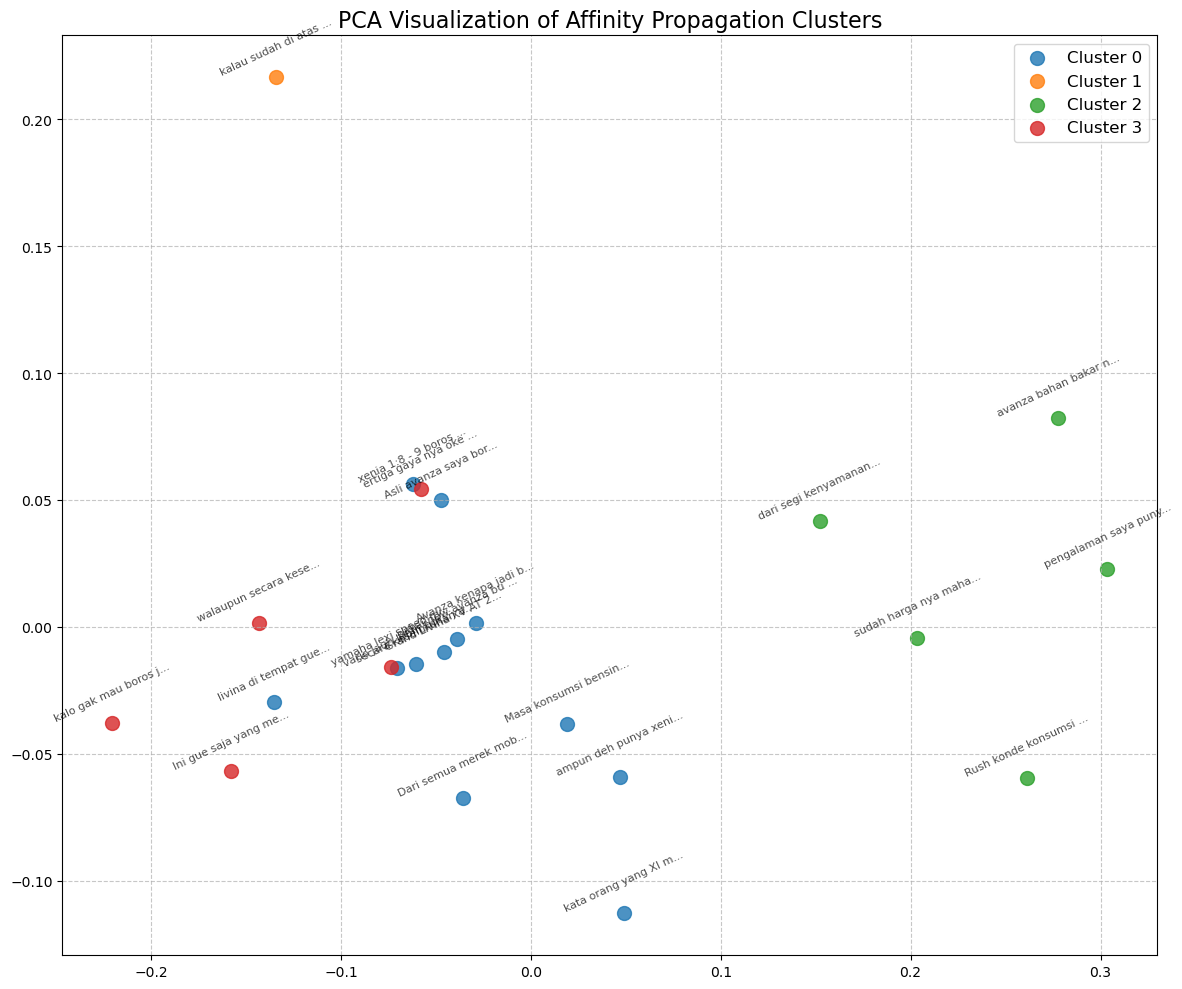


Examples from each cluster:

Cluster 0:
- Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .
- Asli avanza saya boros akhir-akhir ini
- pakai new avanza bu . Boros bensin haha
 ... and 9 more sentences

Cluster 1:
- kalau sudah di atas 120 km / jam boros banget avanza saya , terus kopling nya memang agak keras juragan .

Cluster 2:
- dari segi kenyamanan cortez oke lah, tapi bahan bakar nya itu loh boros banget
- Rush konde konsumsi BBM yang tetap irit .
- pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia
 ... and 2 more sentences

Cluster 3:
- walaupun secara keseluruha oke tapi kalo bensinnya boros jadi malas beli
- ertiga gaya nya oke banget, tarikan juga mantap dan bandel tapi sayang nya boros banget
- yamaha lexi speed nya gila, tarikan nya juara, cuma yah, bensin nya nyedot, bro.
 ... and 2 more sentences

Common words per cluster:

Cluster 0 common words:
 boros: 9
 bensin: 6
 avanza: 3
 nya: 3
 Avanza: 2


In [26]:
# Apply Affinity Propagation clustering with optimized parameters
def apply_optimized_affinity_propagation(feature_array):
    """
    Apply Affinity Propagation clustering with optimized parameters for Word2Vec embeddings
    """
    ## damping is a parameter that controls the degree of damping in the algorithm.
    # Higher values lead to more stable clusters, but may miss some fine-grained structures
    # Lower values can capture more clusters but may be less stable.
    damping_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
    best_silhouette = -1
    best_labels = None
    best_damping = None
    best_n_clusters = 0

    for damping in damping_values:
        print(f"Testing Affinity Propagation with damping={damping}")
        try:
            # Apply Affinity Propagation
            ap = AffinityPropagation(
                damping=damping,
                max_iter=1000,
                convergence_iter=50,
                random_state=42
            )

            # Fit and predict
            labels = ap.fit_predict(feature_array)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # If only one cluster is found, skip evaluation
            if n_clusters <= 1:
                print(f" Only {n_clusters} clusters found, skipping.")
                continue

            # Evaluate using silhouette score
            silhouette = silhouette_score(feature_array, labels)
            print(f" Found {n_clusters} clusters with silhouette score: {silhouette:.4f}")

            # Update best parameters if better score is found
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_labels = labels
                best_damping = damping
                best_n_clusters = n_clusters

        except Exception as e:
            print(f"Error with damping={damping}: {e}")

    if best_labels is not None:
        print("Could not find good clusters with Affinity Propagation. Using default parameters.")
        ap = AffinityPropagation(random_state=42)
        best_labels = ap.fit_predict(feature_array)
        best_damping = 0.5
        best_n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)

    print(f"\nBest Affinity Propagation results:")
    print(f" Damping: {best_damping}")
    print(f" Number of clusters: {best_n_clusters}")
    print(f" Silhouette score: {best_silhouette:.4f}")

    return best_labels, best_n_clusters

# Apply the optimization
ap_labels, n_ap_clusters = apply_optimized_affinity_propagation(w2v_feature_array)

# Add the cluster labels to the DataFrame
negative_fuel_df['W2V_AP_Cluster'] = ap_labels

# Display cluster statistics
cluster_counts = negative_fuel_df['W2V_AP_Cluster'].value_counts()
print("\nCluster distribution:")
print(cluster_counts)

# Visualize clusters using dimensionality reduction
# First try PCA for cleaner visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(w2v_feature_array)

# If we have many clusters, try t-SNE as an alternative visualization
if n_ap_clusters > 5:
    print("\nApplying t-SNE for better visualization of many clusters...")
    tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
    tsne_result = tsne.fit_transform(w2v_feature_array)

    # Plot t-SNE results
    plt.figure(figsize=(12, 10))
    for cluster in range(n_ap_clusters):
        # Get points in this cluster
        indices = negative_fuel_df['W2V_AP_Cluster'] == cluster

        # Plot points
        plt.scatter(
            tsne_result[indices, 0],
            tsne_result[indices, 1],
            s=100,
            alpha=0.8,
            label=f'Cluster {cluster}'
        )
    
    plt.title('t-SNE Visualization of Affinity Propagation Clusters', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot PCA results
plt.figure(figsize=(12, 10))
for cluster in range(n_ap_clusters):
    # Get points in this cluster
    indices = negative_fuel_df['W2V_AP_Cluster'] == cluster

    # Plot points
    plt.scatter(
        pca_result[indices, 0],
        pca_result[indices, 1],
        s=100,
        alpha=0.8,
        label=f'Cluster {cluster}'
    )

# Add sentence texts as annotations
for i, (x, y) in enumerate(pca_result):
    txt = negative_fuel_df['sentence'].iloc[i][:20] + '...'
    cluster = negative_fuel_df['W2V_AP_Cluster'].iloc[i]
    plt.annotate(
        txt,
        (x, y),
        fontsize=8,
        alpha=0.7,
        ha='center',
        va='bottom',
        rotation=25
    )

plt.title('PCA Visualization of Affinity Propagation Clusters',
fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print examples from each cluster
print("\nExamples from each cluster:")
for cluster in range(n_ap_clusters):
    print(f"\nCluster {cluster}:")
    cluster_sentences = negative_fuel_df[negative_fuel_df['W2V_AP_Cluster'] == cluster]['sentence'].values
    for sentence in cluster_sentences[:3]: # Show first 3 sentences in each cluster
        print(f"- {sentence}")
    if len(cluster_sentences) > 3:
        print(f" ... and {len(cluster_sentences) - 3} more sentences")

# Extract and analyze common words per cluster
def extract_common_words(cluster_sentences, top_n=10):
    """Extract most common words for a set of sentences"""
    all_words = []
    for sentence in cluster_sentences:
        all_words.extend(enhanced_tokenizer(sentence))

    # Count word frequencies
    word_counts = {}
    for word in all_words:
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1
    
    # Sort by frequency
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]

print("\nCommon words per cluster:")
for cluster in range(n_ap_clusters):
    cluster_sentences = negative_fuel_df[negative_fuel_df['W2V_AP_Cluster'] == cluster]['sentence'].values
    common_words = extract_common_words(cluster_sentences)
    print(f"\nCluster {cluster} common words:")
    for word, count in common_words:
        print(f" {word}: {count}")


### Hamming Distance

Character-level Hamming Distance:
'avanza' vs 'pajero': 1.0000
Character comparison:
 Position 0: 'a' vs 'p' ✗
 Position 1: 'v' vs 'a' ✗
 Position 2: 'a' vs 'j' ✗
 Position 3: 'n' vs 'e' ✗
 Position 4: 'z' vs 'r' ✗
 Position 5: 'a' vs 'o' ✗

'bensin' vs 'bensol': 0.3333
Character comparison:
 Position 0: 'b' vs 'b' ✓
 Position 1: 'e' vs 'e' ✓
 Position 2: 'n' vs 'n' ✓
 Position 3: 's' vs 's' ✓
 Position 4: 'i' vs 'o' ✗
 Position 5: 'n' vs 'l' ✗

'boros' vs 'bolos': 0.2000
Character comparison:
 Position 0: 'b' vs 'b' ✓
 Position 1: 'o' vs 'o' ✓
 Position 2: 'r' vs 'l' ✗
 Position 3: 'o' vs 'o' ✓
 Position 4: 's' vs 's' ✓

'mobil' vs 'motor': 0.6000
Character comparison:
 Position 0: 'm' vs 'm' ✓
 Position 1: 'o' vs 'o' ✓
 Position 2: 'b' vs 't' ✗
 Position 3: 'i' vs 'o' ✗
 Position 4: 'l' vs 'r' ✗



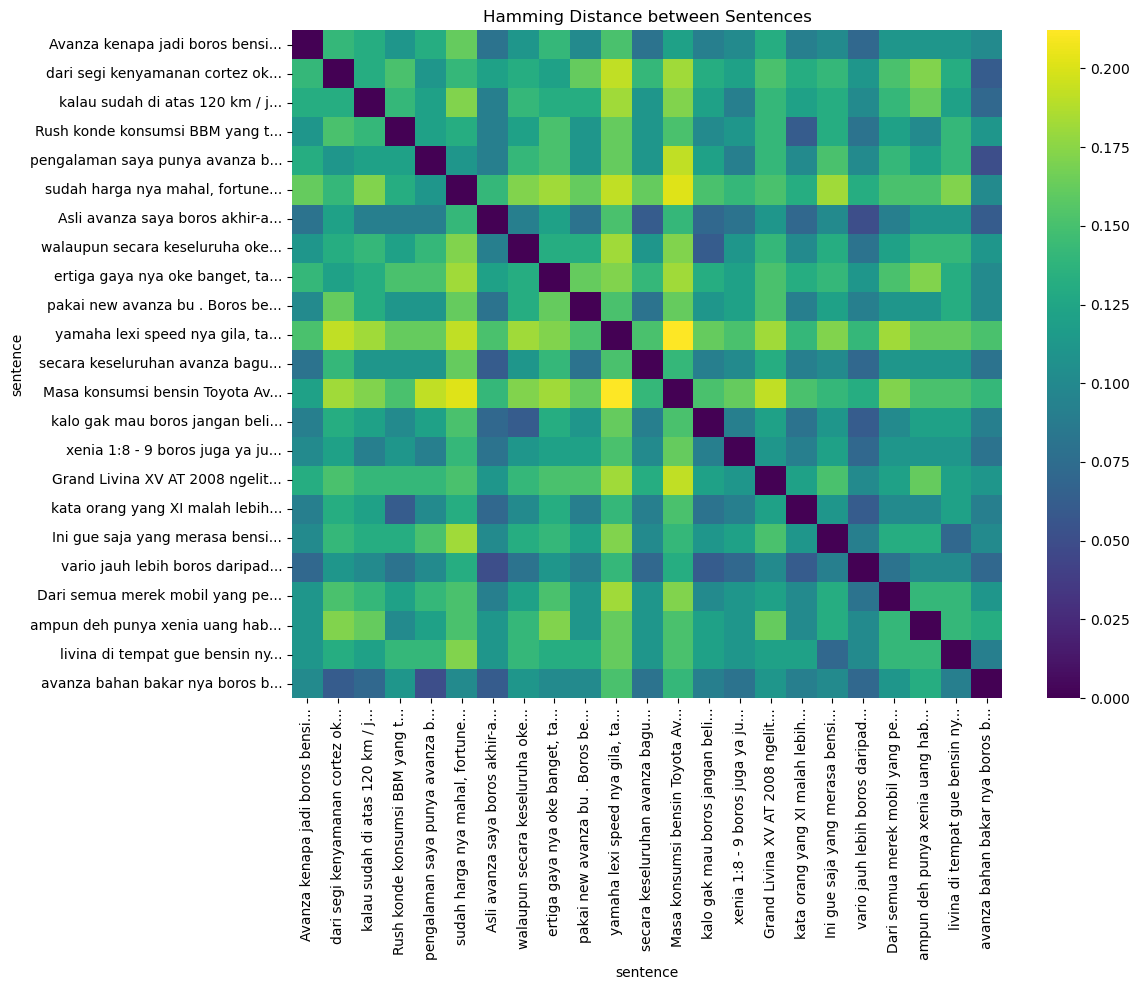


Sentence: Avanza kenapa jadi boros bensin begini dah ah. Bar...
Most similar sentences:
Distance 0.0707: vario jauh lebih boros daripada mio...
Distance 0.0808: Asli avanza saya boros akhir-akhir ini...
Distance 0.0808: secara keseluruhan avanza bagus kecuali pemakaian ...
Distance 0.0909: kalo gak mau boros jangan beli scoopy...
Distance 0.0909: kata orang yang XI malah lebih irit dari yang LI n...

Sentence: sudah harga nya mahal, fortuner ini juga konsumsi ...
Most similar sentences:
Distance 0.1010: avanza bahan bakar nya boros banget...
Distance 0.1111: pengalaman saya punya avanza bahan bakar nya lebih...
Distance 0.1313: Rush konde konsumsi BBM yang tetap irit ....
Distance 0.1313: kata orang yang XI malah lebih irit dari yang LI n...
Distance 0.1313: vario jauh lebih boros daripada mio...

Sentence: yamaha lexi speed nya gila, tarikan nya juara, cum...
Most similar sentences:
Distance 0.1414: kata orang yang XI malah lebih irit dari yang LI n...
Distance 0.1414: vario jauh leb

In [27]:
from scipy.spatial.distance import hamming
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create binary representations of sentences for hamming distance (word level)
# We'll convert each sentence into a binary vector showing presence/absence of words
all_words = set()
for sent in negative_fuel_df['sentence']:
    tokens = enhanced_tokenizer(sent)
    all_words.update(tokens)

# Create binary vectors for each sentence
binary_vectors = []
sentences = negative_fuel_df['sentence'].values

for sent in sentences: 
    tokens = set(enhanced_tokenizer(sent))
    vector = [1 if word in tokens else 0 for word in all_words]
    binary_vectors.append(vector)

# Calculate Hamming distances between all pairs
n_sentences = len(sentences)
hamming_matrix = np.zeros((n_sentences, n_sentences))

for i in range(n_sentences):
    for j in range(n_sentences):
        hamming_matrix[i, j] = hamming(binary_vectors[i], binary_vectors[j])

# Character-level Hamming distance function (new)
def char_hamming_distance(str1, str2):
    """Calculate Hamming distance between two strings at character level"""
    # Make strings the same length by padding shorter one
    max_len = max(len(str1), len(str2))
    str1 = str1.ljust(max_len)
    str2 = str2.ljust(max_len)

    # Count positions where characters differ
    distance = sum(c1 != c2 for c1, c2 in zip(str1, str2))
    return distance / max_len # Normalize by length


# Calculate character-level Hamming distance for words
def demo_char_hamming():
    word_pairs = [
        ("avanza", "pajero"),
        ("bensin", "bensol"),
        ("boros", "bolos"),
        ("mobil", "motor")
    ]

    print("Character-level Hamming Distance:")
    for word1, word2, in word_pairs:
        dist = char_hamming_distance(word1, word2)
        print(f"'{word1}' vs '{word2}': {dist:.4f}")

        # Show character by character comparison
        print("Character comparison:")
        for i, (c1, c2) in enumerate(zip(word1.ljust(max(len(word1), len(word2))), word2.ljust(max(len(word1), len(word2))))): 
            match = "✓" if c1 == c2 else "✗"
            print(f" Position {i}: '{c1}' vs '{c2}' {match}")
        print()

# Run the character-level demo
demo_char_hamming()

# Create a DataFrame for better visualization
hamming_df = pd.DataFrame(
    hamming_matrix,
    index=negative_fuel_df['sentence'].str[:30] + '...',
    columns=negative_fuel_df['sentence'].str[:30] + '...'
)

# Plot the Hamming distance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(hamming_df, cmap='viridis')
plt.title('Hamming Distance between Sentences')
plt.tight_layout()
plt.show()

# Find the most similar sentences based on Hamming distance
def find_most_similar_levenshtein(idx, top_n=5):
    distances = [(i, hamming_matrix[idx, i]) for i in range(n_sentences) if i != idx]
    similar = sorted(distances, key=lambda x: x[1])[:top_n]
    return similar

# Print some examples of similar sentences
for idx in [0, 5, 10]:
    print(f"\nSentence: {sentences[idx][:50]}...")
    similar_idx = find_most_similar_levenshtein(idx)
    print("Most similar sentences:")
    for sim_idx, distance in similar_idx:
        print(f"Distance {distance:.4f}: {sentences[sim_idx] [:50]}...")

### Manhattan Distance

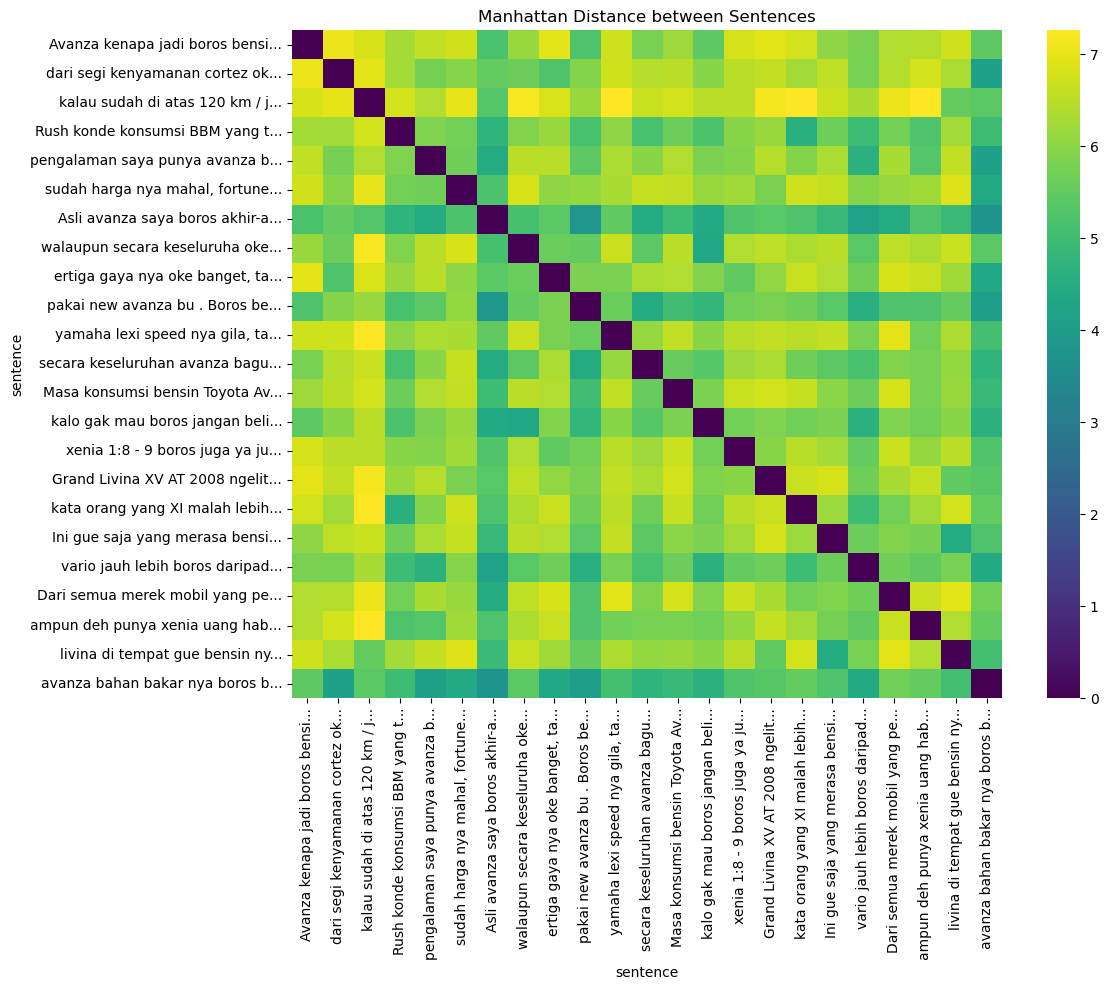


Comparison for: avanza bahan bakar nya boros banget

Top similar sentences by Manhattan distance:
- Asli avanza saya boros akhir-akhir ini... (distance: 3.7527)
- pakai new avanza bu . Boros bensin haha... (distance: 4.0381)
- dari segi kenyamanan cortez oke lah, tapi bahan ba... (distance: 4.1355)
Character-level Manhattan Distance (ASCII differences):
'avanza' vs 'pajero': 76
 Character comparison:
 Position 0: 'a' vs 'p' (diff: 15)

 Position 1: 'v' vs 'a' (diff: 21)

 Position 2: 'a' vs 'j' (diff: 9)

 Position 3: 'n' vs 'e' (diff: 9)

 Position 4: 'z' vs 'r' (diff: 8)

 Position 5: 'a' vs 'o' (diff: 14)

'bensin' vs 'bensol': 8
 Character comparison:
 Position 0: 'b' vs 'b' (diff: 0)

 Position 1: 'e' vs 'e' (diff: 0)

 Position 2: 'n' vs 'n' (diff: 0)

 Position 3: 's' vs 's' (diff: 0)

 Position 4: 'i' vs 'o' (diff: 6)

 Position 5: 'n' vs 'l' (diff: 2)

'boros' vs 'bolos': 6
 Character comparison:
 Position 0: 'b' vs 'b' (diff: 0)

 Position 1: 'o' vs 'o' (diff: 0)

 Position 

In [28]:
from scipy.spatial.distance import cityblock
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Character-level Manhattan distance function
def char_manhattan_distance(str1, str2):
    """Calculate Manhattan distance between two strings at character level"""
    # Make strings the same length by padding shorter one
    max_len = max(len(str1), len(str2))
    str1 = str1.ljust(max_len)
    str2 = str2.ljust(max_len)

    # Sum of absolute differences between ASCII values of characters
    distance = sum(abs(ord(c1) - ord(c2)) for c1, c2 in zip(str1, str2)) 
    return distance

# Calculate Manhattan distances between all pairs of sentences
n_sentences = len(negative_fuel_df)
manhattan_matrix = np.zeros((n_sentences, n_sentences))

# Convert sparse matrix to dense for calculations
tfidf_dense = tfidf_matrix.toarray()

for i in range(n_sentences):
    for j in range(n_sentences):
        # Calculate using cityblock distance (Manhattan)
        manhattan_matrix[i, j] = cityblock(tfidf_dense[i], tfidf_dense[j])

# Create a DataFrame for better visualization
manhattan_df = pd.DataFrame(
    manhattan_matrix,
    index=negative_fuel_df['sentence'].str[:30] + '...',
    columns=negative_fuel_df['sentence'].str[:30] + '...'
)

# Plot the Manhattan distance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(manhattan_df, cmap='viridis')
plt.title('Manhattan Distance between Sentences')
plt.tight_layout()
plt.show()

# Find the most similar sentences based on Manhattan distance
def find_most_similar_manhattan(idx, top_n=5):
    distances = [(i, manhattan_matrix[idx, i]) for i in range(n_sentences) if i != idx]
    similar = sorted(distances, key=lambda x: x[1])[:top_n]
    return similar

# Demonstrate character-level Manhattan distance
def demo_char_manhattan():
    word_pairs = [
        ("avanza", "pajero"),
        ("bensin", "bensol"),
        ("boros", "bolos"),
        ("mobil", "motor")
    ]

    print("Character-level Manhattan Distance (ASCII differences):")
    for word1, word2 in word_pairs:
        dist = char_manhattan_distance(word1, word2)
        print(f"'{word1}' vs '{word2}': {dist}")

        # Show character by character comparison
        print(" Character comparison:")
        for i, (c1, c2) in enumerate(zip(word1.ljust(max(len(word1), len(word2))), word2.ljust(max(len(word1), len(word2))))):
            diff = abs(ord(c1) - ord(c2))
            print(f" Position {i}: '{c1}' vs '{c2}' (diff: {diff})") 
            print()

 
# Compare with other distance metrics
example_idx = 22 # "avanza bahan bakar nya boros banget"
example_sent = negative_fuel_df['sentence'].iloc[example_idx]

# Get similar sentences using all metrics
manhattan_similar = find_most_similar_manhattan(example_idx, 3)

# Display results
print(f"\nComparison for: {example_sent}")
print("\nTop similar sentences by Manhattan distance:")

for idx, dist in manhattan_similar:
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")
    
# Run the character-level demo
demo_char_manhattan()

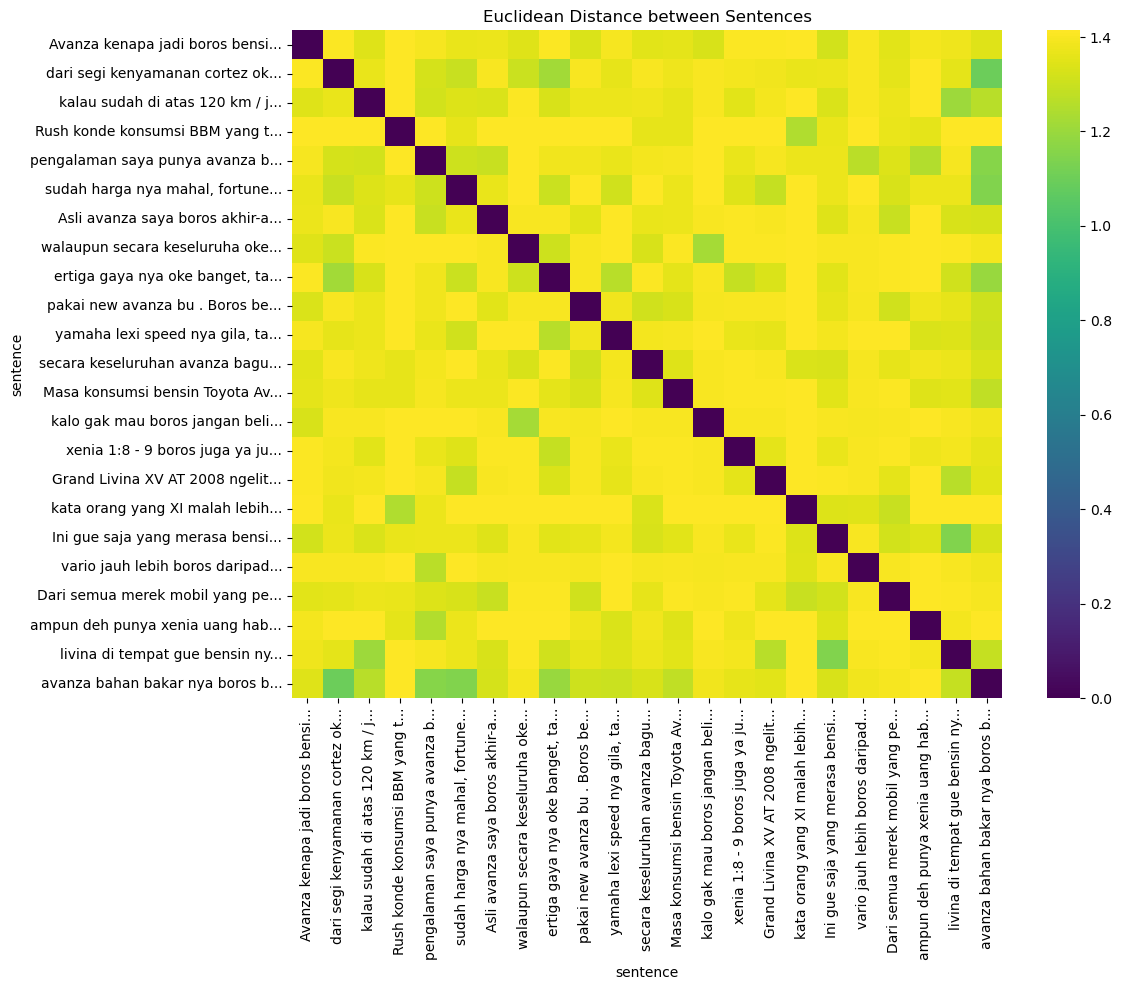


Sentence: Avanza kenapa jadi boros bensin begini dah ah. Bar...
Most similar sentences (Euclidean):
Distance 1.3175: Ini gue saja yang merasa bensin Xenia boros banget...
Distance 1.3261: kalo gak mau boros jangan beli scoopy...
Distance 1.3321: pakai new avanza bu . Boros bensin haha...
Distance 1.3441: walaupun secara keseluruha oke tapi kalo bensinnya...
Distance 1.3446: avanza bahan bakar nya boros banget...

Sentence: sudah harga nya mahal, fortuner ini juga konsumsi ...
Most similar sentences (Euclidean):
Distance 1.1449: avanza bahan bakar nya boros banget...
Distance 1.2891: Grand Livina XV AT 2008 ngelitik nya parah kak sek...
Distance 1.2943: dari segi kenyamanan cortez oke lah, tapi bahan ba...
Distance 1.3032: ertiga gaya nya oke banget, tarikan juga mantap da...
Distance 1.3062: pengalaman saya punya avanza bahan bakar nya lebih...

Sentence: yamaha lexi speed nya gila, tarikan nya juara, cum...
Most similar sentences (Euclidean):
Distance 1.2633: ertiga gaya nya oke bang

In [30]:
from scipy.spatial.distance import euclidean

# Calculate Euclidean distances between all pairs of sentences
n_sentences = len(negative_fuel_df)
euclidean_matrix = np.zeros((n_sentences, n_sentences))
# Convert sparse matrix to dense for calculations
tfidf_dense = tfidf_matrix.toarray()

for i in range(n_sentences):
    for j in range(n_sentences):
        # Calculate using the direct manual formula
        euclidean_matrix[i, j] = np.sqrt(np.sum(np.square(tfidf_dense[i] - tfidf_dense[j])))

# Create a DataFrame for better visualization
euclidean_df = pd.DataFrame(
    euclidean_matrix,
    index=negative_fuel_df['sentence'].str[:30] + '...',
    columns=negative_fuel_df['sentence'].str[:30] + '...'
)

# Plot the Euclidean distance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(euclidean_df, cmap='viridis')
plt.title('Euclidean Distance between Sentences')
plt.tight_layout()
plt.show()

# Find the most similar sentences based on Euclidean distance
def find_most_similar_euclidean(idx, top_n=5):
    distances = [(i, euclidean_matrix[idx, i]) for i in range(n_sentences) if i != idx]
    similar = sorted(distances, key=lambda x: x[1])[:top_n]
    return similar

# Print some examples of similar sentences
for idx in [0, 5, 10]:
    print(f"\nSentence: {negative_fuel_df['sentence'].iloc[idx] [:50]}...")
    similar_idx = find_most_similar_euclidean(idx)
    print("Most similar sentences (Euclidean):")
    for sim_idx, distance in similar_idx:
        print(f"Distance {distance:.4f}: {negative_fuel_df['sentence'].iloc[sim_idx][:50]}...")

# Get a specific sentence
example_idx = 22 # "avanza bahan bakar nya boros banget"
example_sent = negative_fuel_df['sentence'].iloc[example_idx]

# Identify most similar sentences by both metrics
euclidean_similar = find_most_similar_euclidean(example_idx, 3)
cosine_similar = [(i, 1-similarity_matrix[example_idx, i]) for i in
range(n_sentences) if i != example_idx]
cosine_similar = sorted(cosine_similar, key=lambda x: x[1])[:3]

# Display results
print(f"\nComparison for: {example_sent}")
print("\nTop similar by Euclidean distance:")
for idx, dist in euclidean_similar:
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")

print("\nTop similar by Cosine distance:")
for idx, dist in cosine_similar:
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")

idx1 = 22 # "avanza bahan bakar nya boros banget"
idx2 = 1 # One of the most similar sentences

print("\nManual calculation example:")
print(f"Sentence 1: {negative_fuel_df['sentence'].iloc[idx1]}")
print(f"Sentence 2: {negative_fuel_df['sentence'].iloc[idx2]}")

manual_dist = np.sqrt(np.sum(np.square(tfidf_dense[idx1] - tfidf_dense[idx2])))

print(f"Manual formula distance: {manual_dist:.6f}")

print("\nDetailed calculation steps:")
diff = tfidf_dense[idx1] - tfidf_dense[idx2]
squared_diff = np.square(diff)
sum_squared_diff = np.sum(squared_diff)
euclidean_distance = np.sqrt(sum_squared_diff)

print(f"1. Calculate difference between vectors")
print(f"2. Square each element: sum of squares = {sum_squared_diff:.6f}")
print(f"3. Take square root: final distance = {euclidean_distance:.6f}")

### Eucledean Distance
### LEVENSHTEIN EDIT DISTANCE

In [31]:
def levenshtein_distance(s1, s2):
    """
    Calculate the Levenshtein edit distance between two strings
    with visualization of the distance matrix
    """
    # Create a matrix
    rows = len(s1) + 1
    cols = len(s2) + 1
    distance_matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    # Initialize the first row and column
    for i in range(rows):
        distance_matrix[i][0] = i
    for j in range(cols):
        distance_matrix[0][j] = j

    # Fill in the rest of the matrix
    for i in range(1, rows):    
        for j in range(1, cols):
            if s1[i-1] == s2[j-1]:
                cost = 0
            else:
                cost = 1

            distance_matrix[i][j] = min(
                distance_matrix[i-1][j] + 1,      # deletion
                distance_matrix[i][j-1] + 1,      # insertion
                distance_matrix[i-1][j-1] + cost  # substitution
            )

    return distance_matrix

# Example with a single word
word1 = "avanza"
word2 = "Pajero"

# Calculate distance matrix
distance_matrix = levenshtein_distance(word1, word2)

# Print the matrix with row and column labels
print(f"Levenshtein Edit Distance Matrix between '{word1}' and '{word2}'")
print(" " + " ".join(f"{c:2}" for c in [''] + list(word2)))
for i, row in enumerate(distance_matrix):
    label = word1[i-1] if i > 0 else ''
    print(f"{label:2} {' '.join(f'{cell:2d}' for cell in row)}")

# Determine the edit operations needed
i, j = len(word1), len(word2)
operations = []

while i > 0 or j > 0:
    if i > 0 and j > 0 and word1[i-1] == word2[j-1]:
        operations.append(f"Match '{word1[i-1]}'")
        i -= 1
        j -= 1
    elif i > 0 and j > 0 and distance_matrix[i][j] == distance_matrix[i-1][j-1] + 1:
        operations.append(f"Substitute '{word1[i-1]}' → '{word2[j-1]}'")
        i -= 1
        j -= 1
    elif i > 0 and distance_matrix[i][j] == distance_matrix[i-1][j] + 1:
        operations.append(f"Delete '{word1[i-1]}'")
        i -= 1
    elif j > 0 and distance_matrix[i][j] == distance_matrix[i][j-1] + 1:
        operations.append(f"Insert '{word2[j-1]}'")
        j -= 1

print("\nEdit operations (from end to beginning):")
for op in operations:
    print(f"- {op}")

print(f"\nTotal edit distance: {distance_matrix[len(word1)][len(word2)]}")

Levenshtein Edit Distance Matrix between 'avanza' and 'Pajero'
    P  a  j  e  r  o 
    0  1  2  3  4  5  6
a   1  1  1  2  3  4  5
v   2  2  2  2  3  4  5
a   3  3  2  3  3  4  5
n   4  4  3  3  4  4  5
z   5  5  4  4  4  5  5
a   6  6  5  5  5  5  6

Edit operations (from end to beginning):
- Substitute 'a' → 'o'
- Substitute 'z' → 'r'
- Substitute 'n' → 'e'
- Substitute 'a' → 'j'
- Substitute 'v' → 'a'
- Substitute 'a' → 'P'

Total edit distance: 6


### Cosine Distance

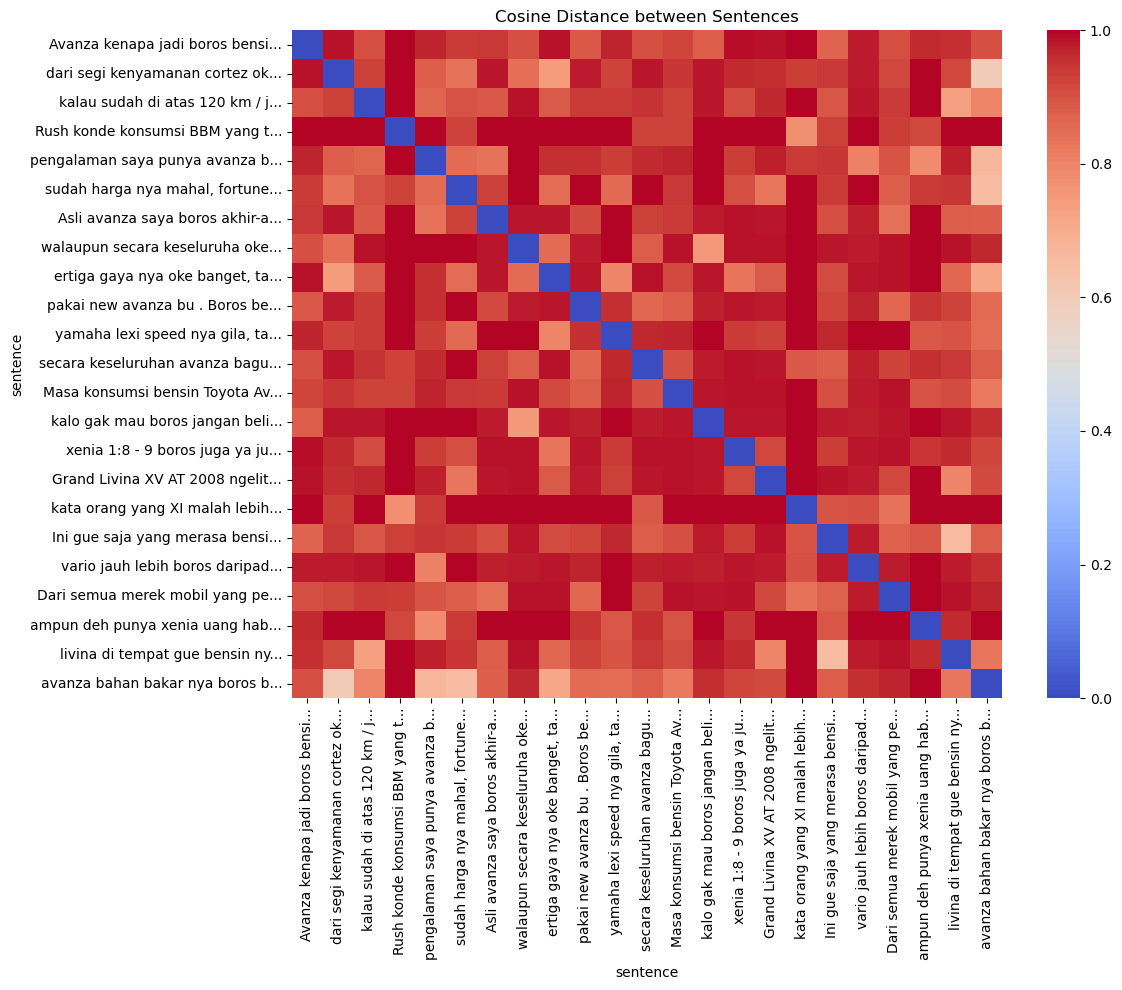


Comparison for: avanza bahan bakar nya boros banget

Top similar by Cosine distance:
- dari segi kenyamanan cortez oke lah, tapi bahan ba... (distance: 0.5990)
- sudah harga nya mahal, fortuner ini juga konsumsi ... (distance: 0.6555)
- pengalaman saya punya avanza bahan bakar nya lebih... (distance: 0.6717)

Top similar by Euclidean distance:
- dari segi kenyamanan cortez oke lah, tapi bahan ba... (distance: 1.0945)
- sudah harga nya mahal, fortuner ini juga konsumsi ... (distance: 1.1449)
- pengalaman saya punya avanza bahan bakar nya lebih... (distance: 1.1590)

Top similar by Levenshtein distance:
- pengalaman saya punya avanza bahan bakar nya lebih... (distance: 0.0505)
- dari segi kenyamanan cortez oke lah, tapi bahan ba... (distance: 0.0606)
- Asli avanza saya boros akhir-akhir ini... (distance: 0.0606)
Character-level Cosine Similarity:
'avanza' vs 'pajero':
 Cosine similarity: 0.3536
 Cosine distance: 0.6464
 Character counts: a: 3/1, e: 0/1, j: 0/1, n: 1/0, o: 0/1, p: 0/1, r

In [32]:
from sklearn.metrics.pairwise import cosine_distances
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate cosine distances between all pairs of sentences
n_sentences = len(negative_fuel_df)
cosine_distance_matrix = cosine_distances(tfidf_matrix)

# Create a DataFrame for better visualization
cosine_distance_df = pd.DataFrame(
    cosine_distance_matrix,
    index=negative_fuel_df['sentence'].str[:30] + '...',
    columns=negative_fuel_df['sentence'].str[:30] + '...'
)

# Plot the cosine distance matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_distance_df, cmap='coolwarm')
plt.title('Cosine Distance between Sentences')
plt.tight_layout()
plt.show()

# Find the most similar sentences based on Cosine distance
def find_most_similar_cosine(idx, top_n=5):
    distances = [(i, cosine_distance_matrix[idx, i]) for i in
range(n_sentences) if i != idx]
    similar = sorted(distances, key=lambda x: x[1])[:top_n]
    return similar

# Character-level cosine similarity function
def char_cosine_similarity(str1, str2):
    """Calculate cosine similarity between two strings at character level"""
    # Create character sets of both strings
    chars = set(str1 + str2)

    # Create character frequency vectors
    vec1 = np.array([str1.count(c) for c in chars])
    vec2 = np.array([str2.count(c) for c in chars])

    # Compute cosine similarity
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    similarity = dot_product / (norm_vec1 * norm_vec2) if norm_vec1 * norm_vec2 != 0 else 0
    return similarity

# Compare word pairs with character-level cosine similarity
def demo_char_cosine():
    word_pairs = [
        ("avanza", "pajero"),
        ("bensin", "bensol"),
        ("boros", "bolos"),
        ("mobil", "motor"),
    ]

    print("Character-level Cosine Similarity:")
    for word1, word2 in word_pairs:
        similarity = char_cosine_similarity(word1, word2)
        distance = 1 - similarity

        print(f"'{word1}' vs '{word2}':")
        print(f" Cosine similarity: {similarity:.4f}")
        print(f" Cosine distance: {distance:.4f}")

        # Show character frequencies
        chars = sorted(set(word1 + word2))
        print(f" Character counts: {', '.join([f'{c}: {word1.count(c)}/{word2.count(c)}' for c in chars])}")
        print()

# Compare with other distance metrics
example_idx = 22 # "avanza bahan bakar nya boros banget"
example_sent = negative_fuel_df['sentence'].iloc[example_idx]

# Get similar sentences using cosine distance
cosine_similar = find_most_similar_cosine(example_idx, 3)

# Display comparison results
print(f"\nComparison for: {example_sent}")

print("\nTop similar by Cosine distance:")
for idx, dist in cosine_similar:
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")

print("\nTop similar by Euclidean distance:")
for idx, dist in find_most_similar_euclidean(example_idx, 3):
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")

print("\nTop similar by Levenshtein distance:")
for idx, dist in find_most_similar_levenshtein(example_idx, 3):
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")

# Run the character-level demo
demo_char_cosine()

# Calculate cosine similarity between sentences
def sentence_cosine_similarity(sent1, sent2):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([sent1, sent2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity

# Compare sentence pairs with both word-level and character-level cosine similarity
sentence_pairs = [
    (negative_fuel_df['sentence'].iloc[22], negative_fuel_df['sentence'].iloc[1]), # Similar sentences
    (negative_fuel_df['sentence'].iloc[22], negative_fuel_df['sentence'].iloc[3]) # Dissimilar sentences
]

print("Sentence Comparison - Word vs Character Level:")
for sent1, sent2 in sentence_pairs:
    word_sim = sentence_cosine_similarity(sent1, sent2)
    char_sim = char_cosine_similarity(sent1, sent2)

    print(f"\nSentence 1: {sent1[:50]}...")
    print(f"Sentence 2: {sent2[:50]}...")
    print(f"Word-level cosine similarity: {word_sim:.4f}")
    print(f"Character-level cosine similarity: {char_sim:.4f}")
    print(f"Word-level cosine distance: {1-word_sim:.4f}")
    print(f"Character-level cosine distance: {1-char_sim:.4f}")


### COSINE SIMILARITY

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


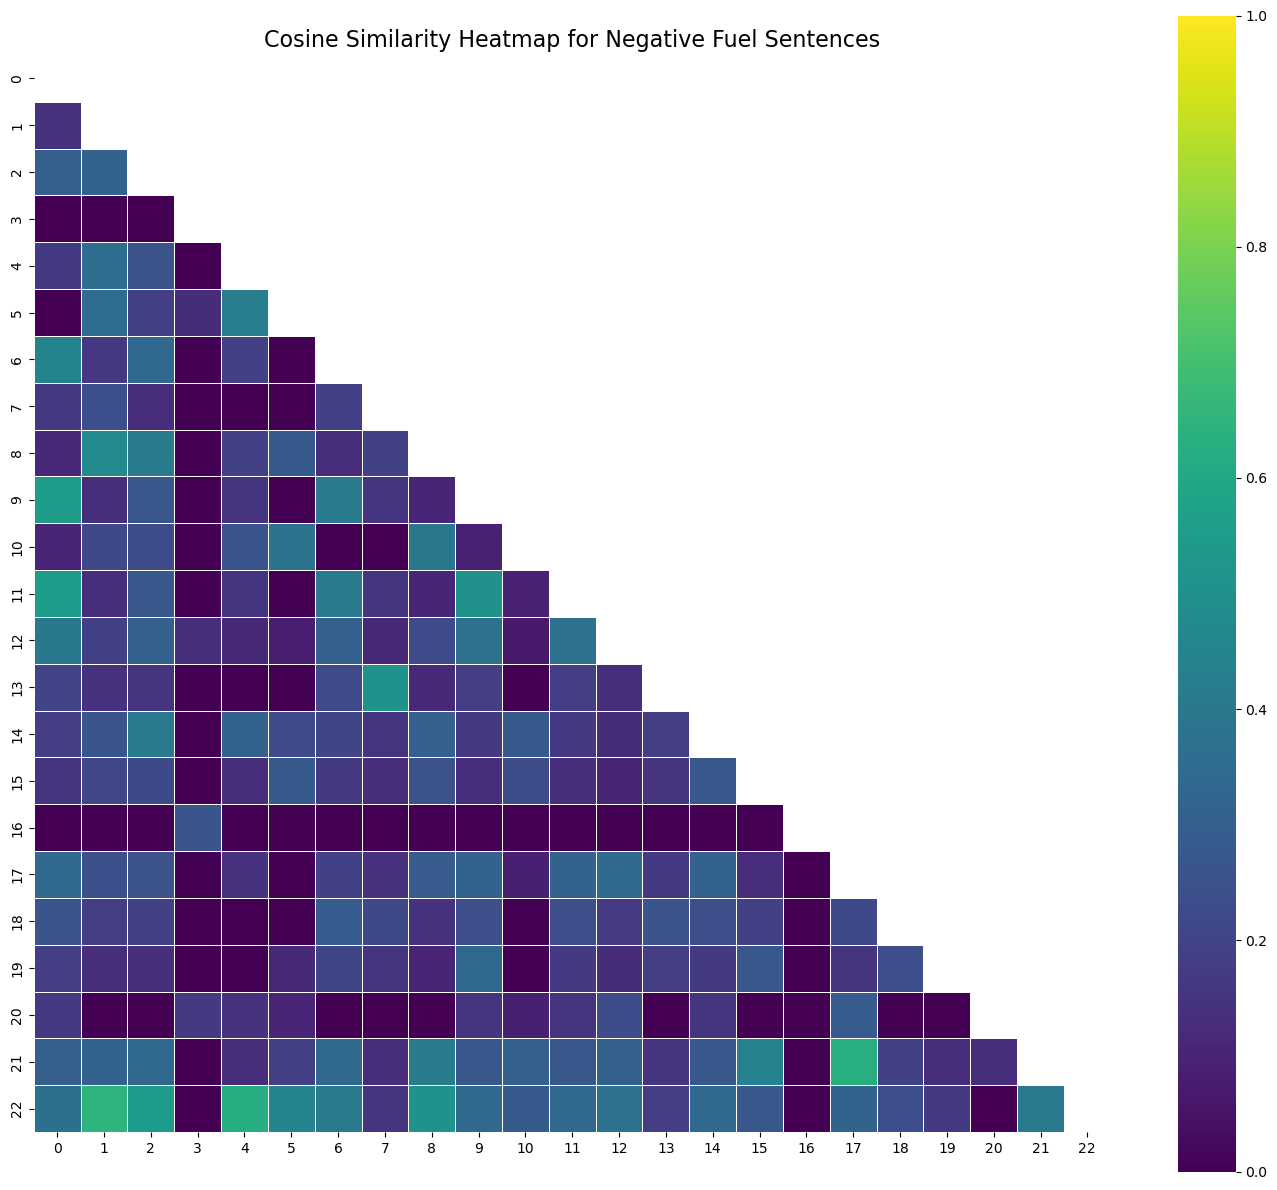

Top similar sentence pairs by cosine similarity:
--------------------------------------------------------------------------------
Similarity: 0.6455
Sentence 1: dari segi kenyamanan cortez oke lah, tapi bahan bakar nya itu loh boros banget
Sentence 2: avanza bahan bakar nya boros banget
--------------------------------------------------------------------------------
Similarity: 0.6299
Sentence 1: Ini gue saja yang merasa bensin Xenia boros banget apa memang iya sih
Sentence 2: livina di tempat gue bensin nya asli boros banget kalau soal ngelitik memang iya
--------------------------------------------------------------------------------
Similarity: 0.6172
Sentence 1: pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia
Sentence 2: avanza bahan bakar nya boros banget
--------------------------------------------------------------------------------
Similarity: 0.5477
Sentence 1: Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setenga

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a cosine similarity matrix for sentence comparison using CountVectorizer
def create_cosine_similarity_matrix(sentences):
    # Create count vectorizer
    count_vectorizer = CountVectorizer(tokenizer=enhanced_tokenizer, stop_words=None)
    count_matrix = count_vectorizer.fit_transform(sentences)

    # Calculate cosine similarity
    cosine_sim_matrix = cosine_similarity(count_matrix)

    return cosine_sim_matrix, count_vectorizer

# Generate the similarity matrix
sentences = negative_fuel_df['sentence'].values
cosine_sim_matrix, count_vectorizer = create_cosine_similarity_matrix(sentences)

# Create a heatmap visualization
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(cosine_sim_matrix, dtype=bool))
sns.heatmap(cosine_sim_matrix,
            mask=mask,
            cmap='viridis',
            vmin=0,
            vmax=1,
            center=0.5,
            square=True,
            linewidths=.5)
plt.title('Cosine Similarity Heatmap for Negative Fuel Sentences', fontsize=16)
plt.tight_layout()
plt.show()

# Find the most similar pairs of sentences
def find_most_similar_pairs(similarity_matrix, sentences, top_n=10):
    n = len(sentences)
    similarity_pairs = []

    # Collect all pairs and their similarity scores
    for i in range(n):
        for j in range(i+1, n):
            if similarity_matrix[i, j] > 0: # Only consider non-zero similarities
                similarity_pairs.append((i, j, similarity_matrix[i,j]))
    
    # Sort by similarity in descending order
    similarity_pairs.sort(key=lambda x: x[2], reverse=True)

    # Return the top_n pairs
    return similarity_pairs[:top_n]

# Get the most similar pairs
top_similar_pairs = find_most_similar_pairs(cosine_sim_matrix, sentences)

# Display the results
print("Top similar sentence pairs by cosine similarity:")
print("-" * 80)
for i, j, score in top_similar_pairs:
    print(f"Similarity: {score:.4f}")
    print(f"Sentence 1: {sentences[i]}")
    print(f"Sentence 2: {sentences[j]}")
    print("-" * 80)

# Calculate average similarity within the dataset
avg_similarity = np.sum(cosine_sim_matrix) / (len(sentences)**2 - len(sentences))
print(f"Average cosine similarity across all sentence pairs: {avg_similarity:.4f}")


### Hellinger-Bhattacharyya Distance

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


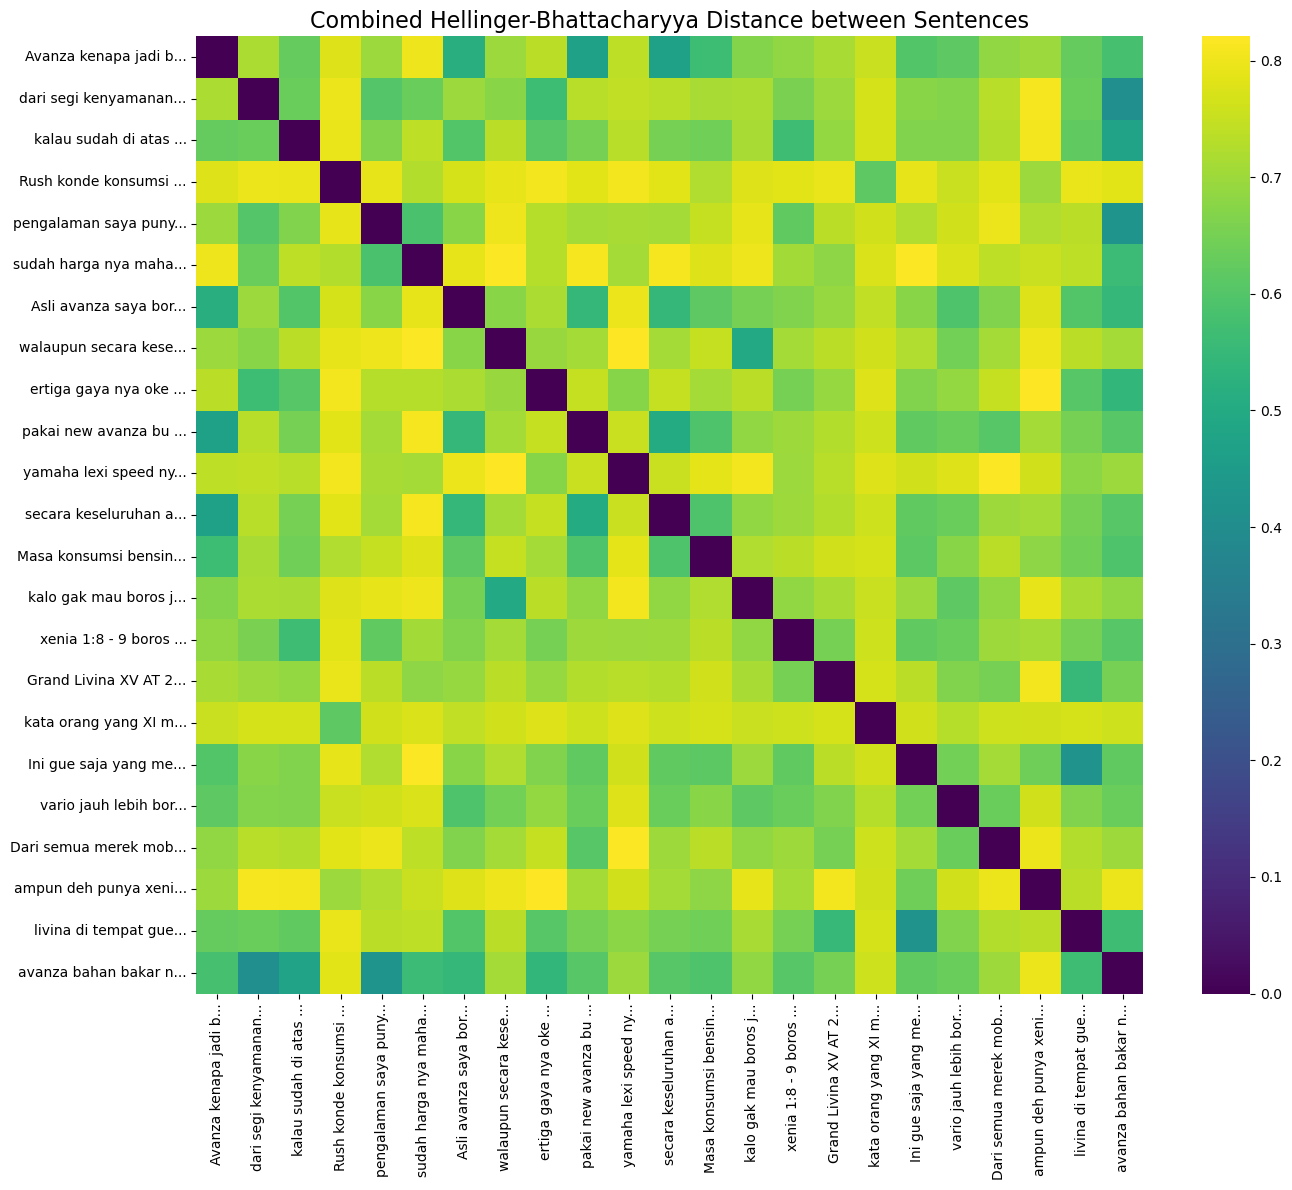


Comparison for: avanza bahan bakar nya boros banget

Top similar by Combined Hellinger-Bhattacharyya distance:
- dari segi kenyamanan cortez oke lah, tapi bahan ba... (distance: 0.4070)
- pengalaman saya punya avanza bahan bakar nya lebih... (distance: 0.4247)
- kalau sudah di atas 120 km / jam boros banget avan... (distance: 0.4771)

Top similar by Hellinger distance:
- dari segi kenyamanan cortez oke lah, tapi bahan ba... (distance: 0.5070)
- pengalaman saya punya avanza bahan bakar nya lebih... (distance: 0.5244)
- kalau sudah di atas 120 km / jam boros banget avan... (distance: 0.5749)

Metric comparison for selected sentences:

Sentence: avanza bahan bakar nya boros banget...
Top by Hellinger:
1.dari segi kenyamanan cortez ok...(0.5070)
2.pengalaman saya punya avanza b...(0.5244)
3.kalau sudah di atas 120 km / j...(0.5749)

Top by Bhattacharyya:
1.dari segi kenyamanan cortez ok...(0.2971)
2.pengalaman saya punya avanza b...(0.3216)
3.kalau sudah di atas 120 km / j...(0.4012)

Top

In [34]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

# Function to calculate Hellinger distance between probability distributions
def hellinger_distance(p, q):
    """
    Calculate the Hellinger distance between two probability distributions.
    Input vectors need to be normalized (sum to 1)
    """
    return np.sqrt(0.5 * np.sum((np.sqrt(p) - np.sqrt(q)) ** 2))

# Function to calculate Bhattacharyya distance
def bhattacharyya_distance(p, q):
    """
    Calculate the Bhattacharyya distance between two probability distributions.
    Input vectors need to be normalized (sum to 1)
    """
    return -np.log(np.sum(np.sqrt(p * q)))

# Function to calculate combined Hellinger-Bhattacharyya distance
def combined_hellinger_bhattacharyya_distance(p, q, alpha=0.5):
    """
    Calculate a weighted combination of Hellinger and Bhattacharyya distances.

    Parameters:
    - p, q: Probability distributions
    - alpha: Weight for Hellinger distance (1-alpha for Bhattacharyya)
    Must be between 0 and 1

    Returns:
    - Combined distance score
    """
    # Normalize Bhattacharyya to [0,1] range for fair combination
    # Bhattacharyya is unbounded, so we use exponential transformation
    h_dist = hellinger_distance(p, q)
    b_dist = bhattacharyya_distance(p, q)

    # Transform Bhattacharyya to [0,1] using 1-exp(-b)
    normalized_b = 1 - np.exp(-b_dist)

    # Weighted combination
    return alpha * h_dist + (1 - alpha) * normalized_b

# Calculate distances between all sentence pairs
n_sentences = len(negative_fuel_df)
hellinger_matrix = np.zeros((n_sentences, n_sentences))
bhattacharyya_matrix = np.zeros((n_sentences, n_sentences))
combined_matrix = np.zeros((n_sentences, n_sentences))

# Use Count Vectorizer to get term frequencies (better for probability distributions)
count_vectorizer = CountVectorizer(tokenizer=enhanced_tokenizer, min_df=1)
count_matrix = count_vectorizer.fit_transform(negative_fuel_df['sentence'])

# Convert to probability distributions by normalizing each document vector
normalized_counts = []
for i in range(count_matrix.shape[0]):
    row = count_matrix[i].toarray().flatten()
    # Add smoothing to avoid zeros (which cause problems with Bhattacharyya)
    row = row + 0.01
    normalized_counts.append(row / np.sum(row)) # Normalize to sum to 1

# Calculate distance matrices
for i in range(n_sentences):
    for j in range(n_sentences):
        hellinger_matrix[i, j] = hellinger_distance(normalized_counts[i], normalized_counts[j])
        bhattacharyya_matrix[i, j] = bhattacharyya_distance(normalized_counts[i], normalized_counts[j])
        combined_matrix[i, j] = combined_hellinger_bhattacharyya_distance(normalized_counts[i], normalized_counts[j], alpha=0.6)

# Visualize the combined distance matrix
plt.figure(figsize=(14, 12))
sns.heatmap(combined_matrix, cmap='viridis', xticklabels=[s[:20] + '...' for s in negative_fuel_df['sentence']], yticklabels=[s[:20] + '...' for s in negative_fuel_df['sentence']])
plt.title('Combined Hellinger-Bhattacharyya Distance between Sentences', fontsize=16)
plt.tight_layout()
plt.show()

# Find most similar sentences by combined distance
def find_most_similar_combined(idx, top_n=5):
    distances = [(i, combined_matrix[idx, i]) for i in range(n_sentences) if i != idx]
    similar = sorted(distances, key=lambda x: x[1])[:top_n]
    return similar

# Find most similar sentences by Hellinger distance
def find_most_similar_hellinger(idx, top_n=5):
    distances = [(i, hellinger_matrix[idx, i]) for i in range(n_sentences) if i != idx]
    similar = sorted(distances, key=lambda x: x[1])[:top_n]
    return similar

# Compare with other distance metrics for a sample sentence
example_idx = 22 # "avanza bahan bakar nya boros banget"
example_sent = negative_fuel_df['sentence'].iloc[example_idx]

print(f"\nComparison for: {example_sent}")
print("\nTop similar by Combined Hellinger-Bhattacharyya distance:")
for idx, dist in find_most_similar_combined(example_idx, 3):
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")


print("\nTop similar by Hellinger distance:")
for idx, dist in find_most_similar_hellinger(example_idx, 3):
    print(f"- {negative_fuel_df['sentence'].iloc[idx][:50]}... (distance: {dist:.4f})")

# Compare the effectiveness of the combined metric vs individual metrics
def compare_metric_effectiveness():
    # Analyze how the metrics rank the same pairs differently
    example_indices = [22, 1, 9] # Sample indices to compare

    print("\nMetric comparison for selected sentences:")
    for idx in example_indices:
        sent = negative_fuel_df['sentence'].iloc[idx]
        print(f"\nSentence: {sent[:50]}...")

        # Get top 3 most similar by each metric
        hell_similar = find_most_similar_hellinger(idx, 3)
        bhat_similar = sorted([(i, bhattacharyya_matrix[idx, i]) for i in range(n_sentences) if i != idx], key=lambda x: x[1])[:3] 
        comb_similar = find_most_similar_combined(idx, 3)

        # Compare rankings
        print("Top by Hellinger:")
        for i, (similar_idx, dist) in enumerate(hell_similar):
            print(f"{i+1}.{negative_fuel_df['sentence'].iloc[similar_idx][:30]}...({dist:.4f})")

        print("\nTop by Bhattacharyya:")
        for i, (similar_idx, dist) in enumerate(bhat_similar):
            print(f"{i+1}.{negative_fuel_df['sentence'].iloc[similar_idx][:30]}...({dist:.4f})")
        
        print("\nTop by Combined:")
        for i, (similar_idx, dist) in enumerate(comb_similar):
            print(f"{i+1}.{negative_fuel_df['sentence'].iloc[similar_idx][:30]}...({dist:.4f})")
        
# Run the comparison
compare_metric_effectiveness()